In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
previous_application=pd.read_csv('previous_application.csv')
application_data=pd.read_csv('application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
application_data.isnull().sum()
 

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
application_data_categorical_col=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'DAYS_BIRTH','DAYS_EMPLOYED', 'OCCUPATION_TYPE'
,'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

application_data_continuos_col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']
index_col_in_both_data_set=['SK_ID_PREV_pre', 'SK_ID_CURR_app']

previous_appl_categorical_col=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NFLAG_MICRO_CASH','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
'NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']
previous_appl_continuos_col=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','RATE_INTEREST_PRIMARY']


In [7]:
#check shape
(application_data.shape)

(307511, 122)

In [8]:
#check missing values
(application_data.isnull().sum())


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
# drop column those are having more than 50 % misisng values
application_data.drop(application_data.columns[((application_data.isnull().sum()/307511)*100)>50], axis=1, inplace=True )

In [10]:
#check again the shape
application_data.shape

(307511, 81)

In [11]:
 #check column having more than 13% missing values
application_data.columns[((application_data.isnull().sum()/307511)*100)>13]

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [12]:
# drop columns having more than 13% missing values
application_data.drop(application_data.columns[((application_data.isnull().sum()/307511)*100)>14], axis=1, inplace=True )

In [13]:
#check shape again
application_data.shape

(307511, 71)

In [14]:
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 71, dtype: int64

In [15]:
 #check columns
((application_data.isnull().sum()/307511)*100).sort_values(ascending=False)
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [16]:
application_data_categorical_col=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'DAYS_BIRTH','DAYS_EMPLOYED' 
,'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

application_data_continuos_col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']

In [17]:
for i in application_data_categorical_col:
    if application_data[i].isnull().sum()>0:
        print(i)

CNT_FAM_MEMBERS


In [18]:
application_data.CNT_FAM_MEMBERS.isnull().sum()

2

In [19]:
application_data[application_data.CNT_FAM_MEMBERS.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
41982       33750.0  ...                 0                0                0   
187348      29250.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
41982                 0                        NaN                       NaN   
187348                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
41982                          NaN                        NaN   
187348                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
41982                         NaN                         NaN  
187348                        0.0                         1.0  

[2 rows x 71 columns]

In [20]:
#take mean of kids
application_data.CNT_FAM_MEMBERS.mean()

2.152665450442101

In [21]:
# fill above mean with null values
application_data.CNT_FAM_MEMBERS.fillna(2, inplace=True)

In [22]:
application_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [23]:
for i in application_data_continuos_col:
    if application_data[i].isnull().sum()>0:
        print(i)

AMT_ANNUITY
AMT_GOODS_PRICE


In [24]:
application_data.AMT_ANNUITY.isnull().sum()

12

In [25]:
application_data.AMT_GOODS_PRICE.isnull().sum()

278

1.5797773638612507


<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

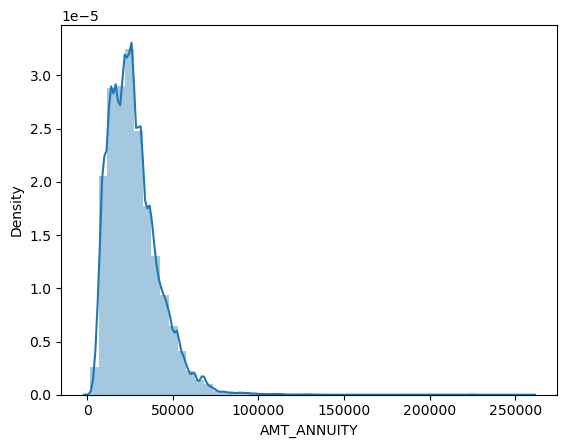

In [26]:
print(application_data.AMT_ANNUITY.skew( skipna = True))
#sns.boxplot(application_data.AMT_ANNUITY)
sns.distplot(application_data.AMT_ANNUITY)

In [27]:
#this is highly skewed so will replace with median()
application_data.AMT_ANNUITY.median()

24903.0

In [28]:
application_data.AMT_ANNUITY.fillna(24903.0, inplace=True)

In [29]:
application_data.AMT_ANNUITY.isnull().sum()

0

In [30]:
application_data.AMT_GOODS_PRICE.isnull().sum()

278

In [31]:
application_data.AMT_GOODS_PRICE.skew()

1.3490003414747445

In [32]:
application_data.AMT_GOODS_PRICE.median()

450000.0

In [33]:
application_data.AMT_GOODS_PRICE.fillna(450000.0, inplace=True)

In [34]:
application_data.AMT_GOODS_PRICE.isnull().sum()

0

In [35]:
print(application_data.dtypes)
print(application_data.columns)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 71, dtype: object
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBER

In [36]:
for i in application_data.columns:
    print(i+"-"+ str(application_data[i].dtypes))

SK_ID_CURR-int64
TARGET-int64
NAME_CONTRACT_TYPE-object
CODE_GENDER-object
FLAG_OWN_CAR-object
FLAG_OWN_REALTY-object
CNT_CHILDREN-int64
AMT_INCOME_TOTAL-float64
AMT_CREDIT-float64
AMT_ANNUITY-float64
AMT_GOODS_PRICE-float64
NAME_TYPE_SUITE-object
NAME_INCOME_TYPE-object
NAME_EDUCATION_TYPE-object
NAME_FAMILY_STATUS-object
NAME_HOUSING_TYPE-object
REGION_POPULATION_RELATIVE-float64
DAYS_BIRTH-int64
DAYS_EMPLOYED-int64
DAYS_REGISTRATION-float64
DAYS_ID_PUBLISH-int64
FLAG_MOBIL-int64
FLAG_EMP_PHONE-int64
FLAG_WORK_PHONE-int64
FLAG_CONT_MOBILE-int64
FLAG_PHONE-int64
FLAG_EMAIL-int64
CNT_FAM_MEMBERS-float64
REGION_RATING_CLIENT-int64
REGION_RATING_CLIENT_W_CITY-int64
WEEKDAY_APPR_PROCESS_START-object
HOUR_APPR_PROCESS_START-int64
REG_REGION_NOT_LIVE_REGION-int64
REG_REGION_NOT_WORK_REGION-int64
LIVE_REGION_NOT_WORK_REGION-int64
REG_CITY_NOT_LIVE_CITY-int64
REG_CITY_NOT_WORK_CITY-int64
LIVE_CITY_NOT_WORK_CITY-int64
ORGANIZATION_TYPE-object
EXT_SOURCE_2-float64
OBS_30_CNT_SOCIAL_CIRCLE-float

In [37]:
application_data.CNT_FAM_MEMBERS.value_counts()


2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [38]:
# convert to int
application_data.CNT_FAM_MEMBERS=application_data.CNT_FAM_MEMBERS.apply(lambda x : int(x))


In [39]:
application_data.CNT_FAM_MEMBERS.dtype

dtype('int64')

In [40]:
application_data.DAYS_BIRTH.dtype

dtype('int64')

In [41]:
application_data.DAYS_BIRTH<0

0         True
1         True
2         True
3         True
4         True
          ... 
307506    True
307507    True
307508    True
307509    True
307510    True
Name: DAYS_BIRTH, Length: 307511, dtype: bool

In [42]:
application_data.DAYS_BIRTH=application_data.DAYS_BIRTH.apply(lambda x: int(str(x).replace('-', '')))


In [43]:
application_data[application_data.DAYS_BIRTH<0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

[0 rows x 71 columns]

In [44]:
application_data.DAYS_EMPLOYED=application_data.DAYS_EMPLOYED.apply(lambda x: int(str(x).replace('-', '')))


In [45]:
application_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [46]:
#application_data.DAYS_REGISTRATION.apply(lambda x: isinstance(x)==float ) ?
#application_data.DAYS_REGISTRATION=
application_data.DAYS_REGISTRATION.apply(lambda x:  1 if
 isinstance(x, float)==True else 0 )


0         1
1         1
2         1
3         1
4         1
         ..
307506    1
307507    1
307508    1
307509    1
307510    1
Name: DAYS_REGISTRATION, Length: 307511, dtype: int64

In [47]:
application_data.DAYS_ID_PUBLISH=application_data.DAYS_ID_PUBLISH.apply(lambda x: int(str(x).replace('-', '')))


In [48]:
application_data.DAYS_EMPLOYED=application_data.DAYS_EMPLOYED.apply(lambda x: int(str(x).replace('-', '')))


In [49]:
#check the outler in numerical column
application_data_categorical_col=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'DAYS_EMPLOYED' 
,'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

application_data_continuos_col=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

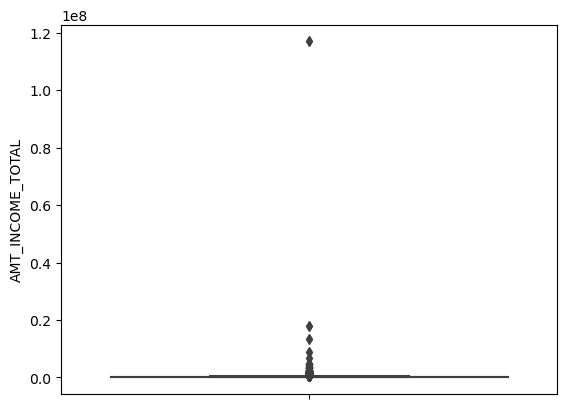

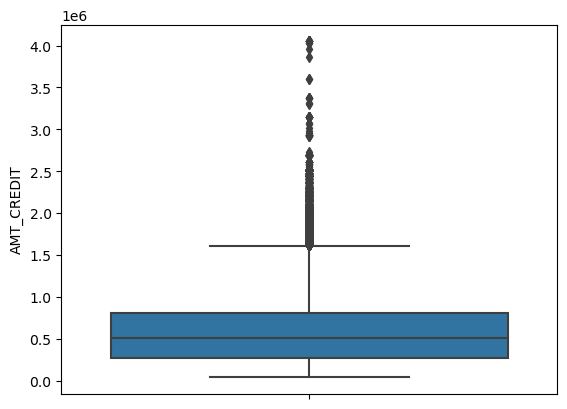

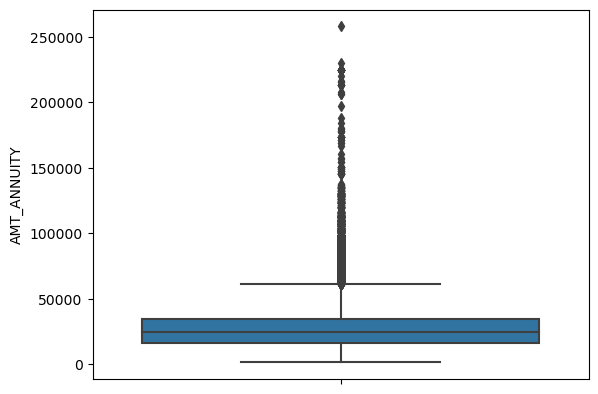

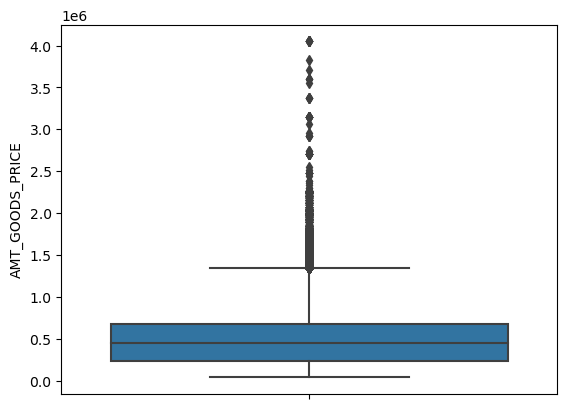

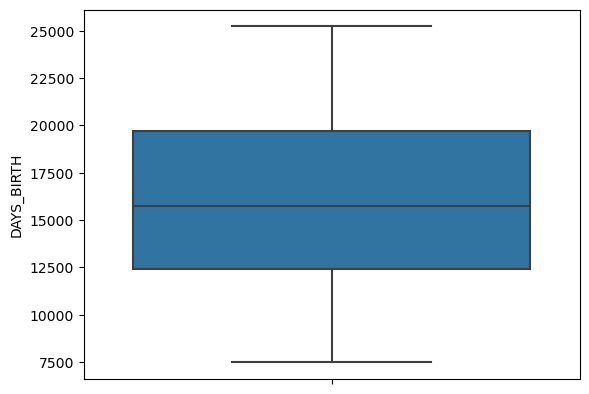

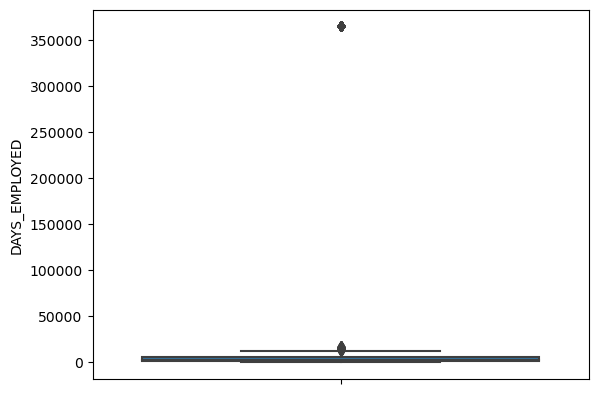

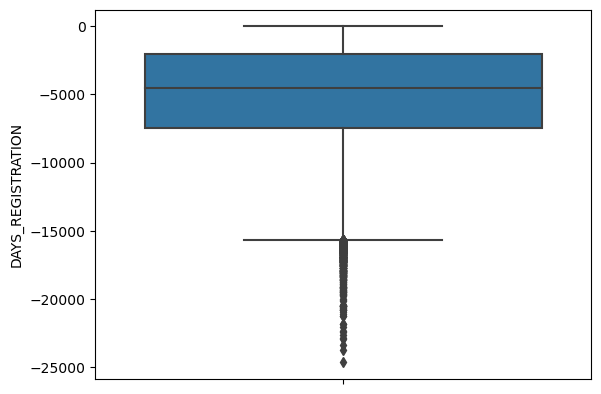

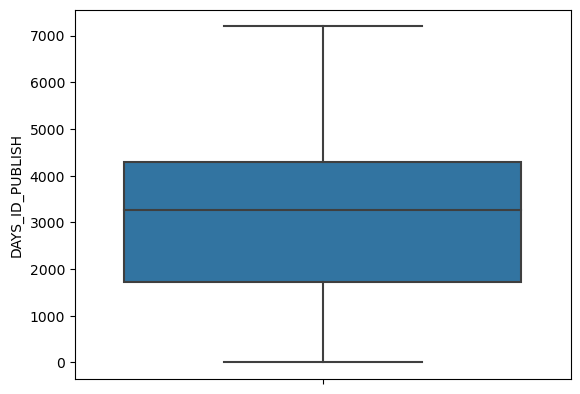

In [50]:
# check outler in numerical column
for i in application_data_continuos_col: 
    sns.boxplot(y=application_data[i])
    plt.show()

In [51]:
application_data.AMT_INCOME_TOTAL.describe()
np.percentile(application_data.AMT_INCOME_TOTAL, [100, 99])

application_data.AMT_INCOME_TOTAL.sort_values(ascending=False)


12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [52]:
application_data.AMT_ANNUITY.describe()

np.percentile(application_data.AMT_ANNUITY, [100, 99, 98, 97, 96])

array([258025.5 ,  70006.5 ,  62964.  ,  58480.65,  55624.5 ])

In [53]:
application_data.AMT_ANNUITY.sort_values(ascending=False)

17948     258025.5
101508    230161.5
109209    225000.0
141371    225000.0
15501     225000.0
            ...   
17048       2052.0
125236      1993.5
145396      1980.0
73549       1980.0
277186      1615.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [54]:
application_data.DAYS_EMPLOYED.describe()

np.percentile(application_data.DAYS_EMPLOYED, [100, 95, 90, 85, 80, 75, 70])

array([365243., 365243., 365243., 365243.,   9188.,   5707.,   4435.])

In [55]:
application_data.DAYS_ID_PUBLISH.describe()

np.percentile(application_data.DAYS_ID_PUBLISH, [100, 95, 90, 85, 80, 75, 70])

array([7197., 4944., 4724., 4568., 4430., 4299., 4172.])

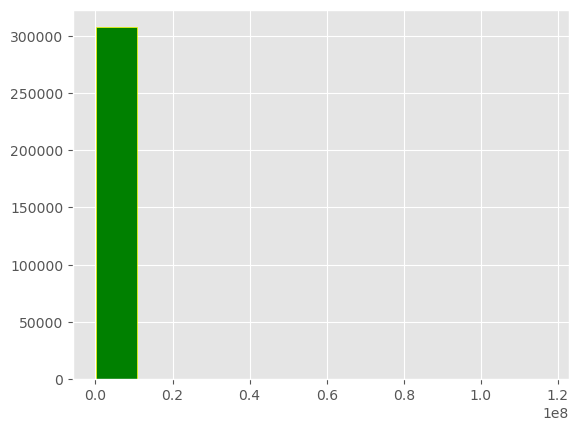

In [85]:
min=(application_data['AMT_INCOME_TOTAL'].min())
max=(application_data['AMT_INCOME_TOTAL'].max())
bins = np.linspace(min, max,12)
plt.hist(application_data['AMT_INCOME_TOTAL'], bins=bins, edgecolor="yellow", color="green")
plt.show()


In [86]:
# imbalance percentage
# Gender Based
application_data.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [87]:
# imbalance percentage
# NAME_CONTRACT_TYPE Based
application_data.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [88]:
# imbalance percentage
# FLAG_OWN_CAR Based
application_data.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

In [89]:
# imbalance percentage
# FLAG_OWN_REALTY Based
application_data.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

In [90]:
# imbalance percentage
# NAME_INCOME_TYPE Based
application_data.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [91]:
# imbalance percentage
# NAME_EDUCATION_TYPE Based
application_data.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [92]:
# imbalance percentage
# NAME_FAMILY_STATUS Based
application_data.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [59]:
# Divide the data into two dataset
dataset_target_0= application_data[application_data.TARGET==0]
dataset_target_1= application_data[application_data.TARGET==1]

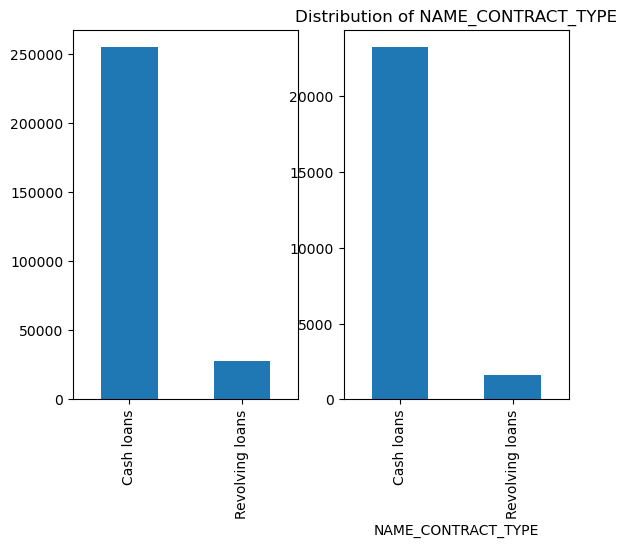

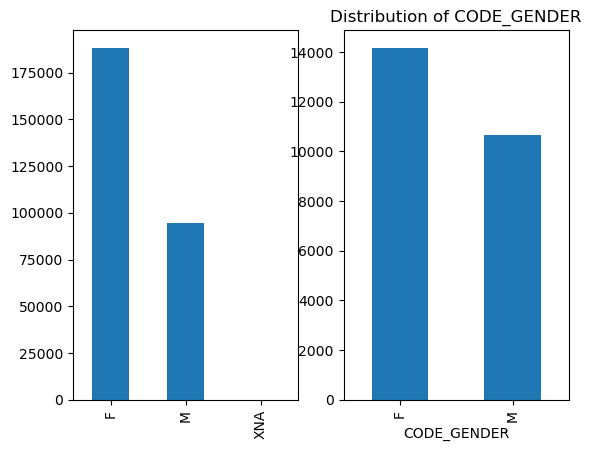

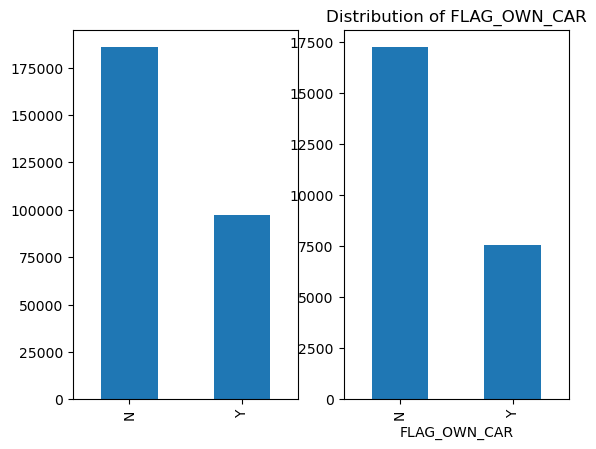

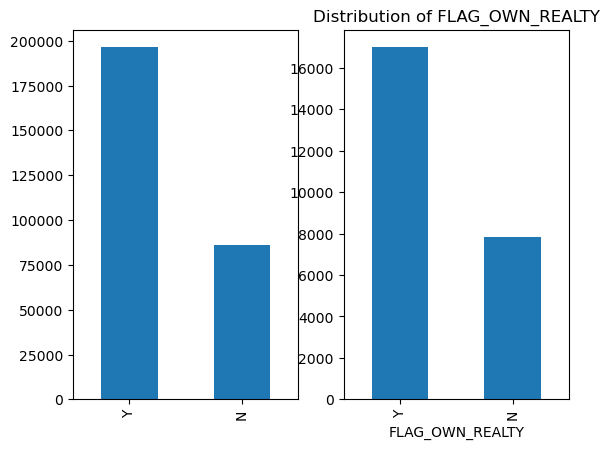

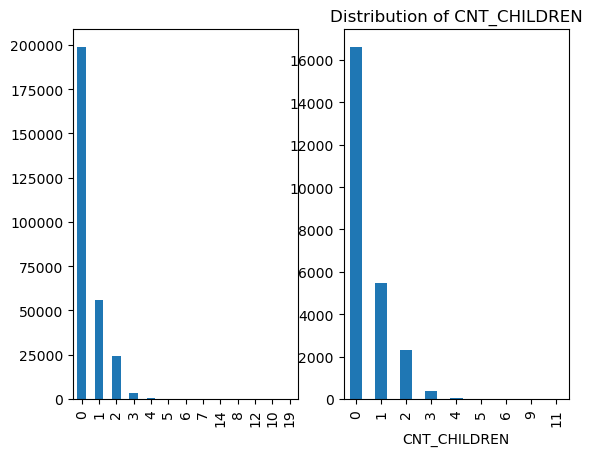

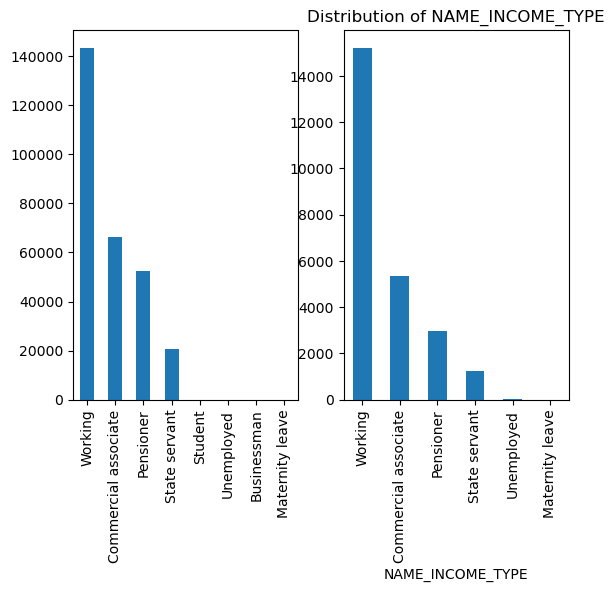

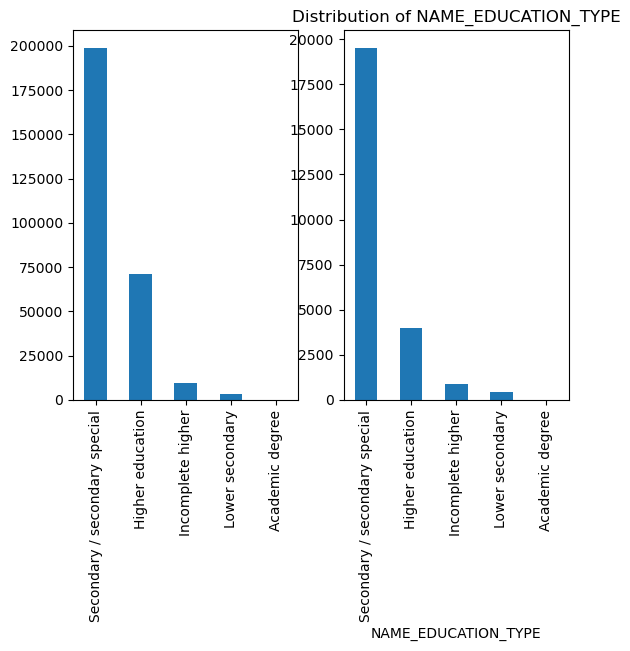

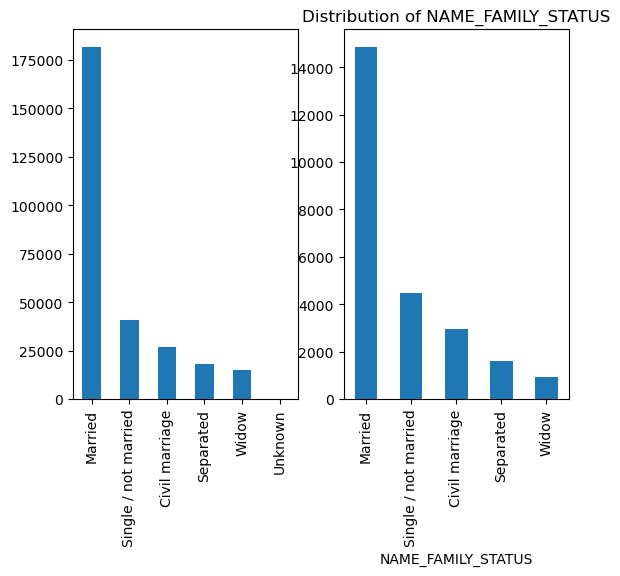

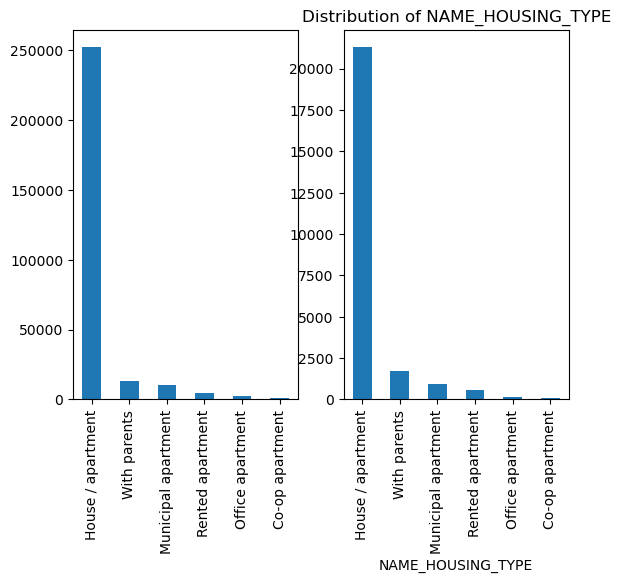

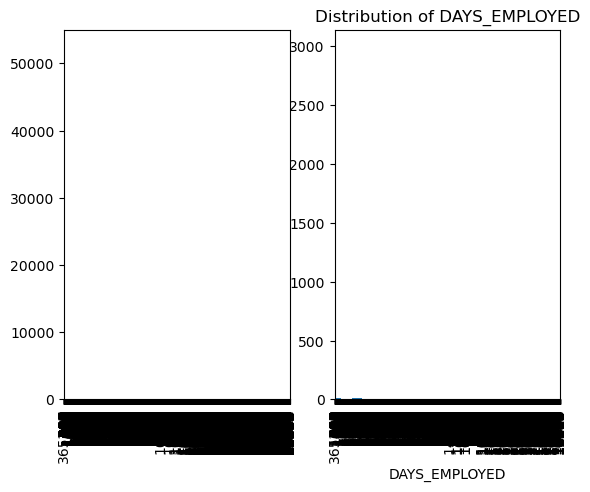

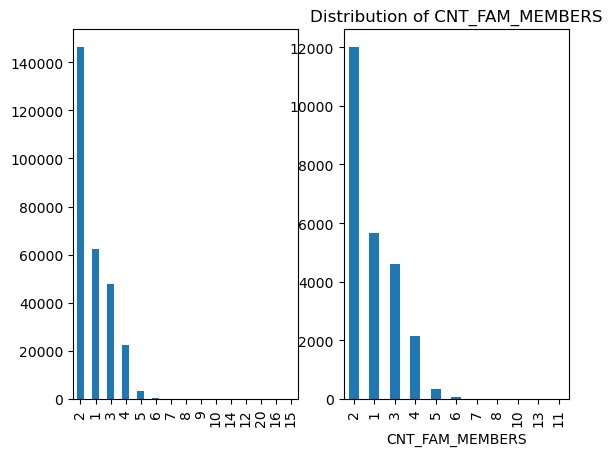

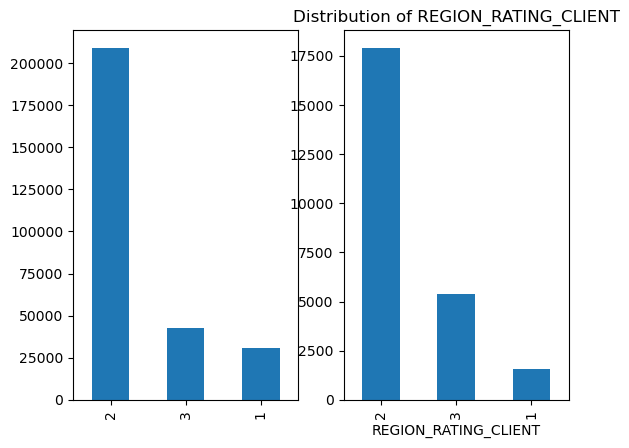

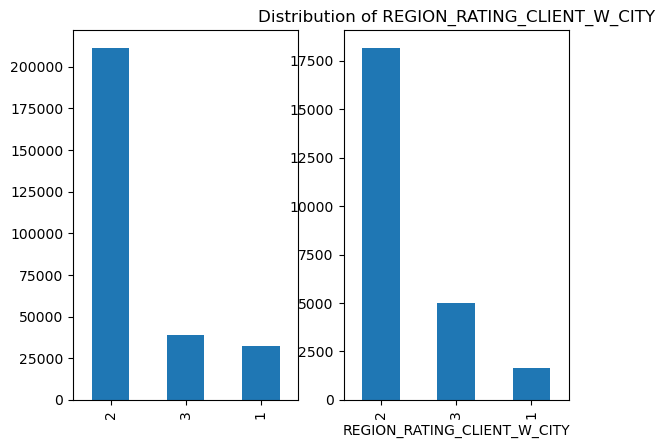

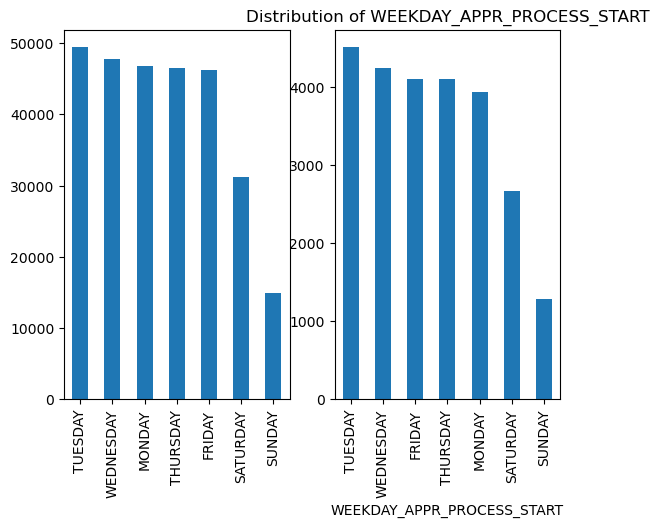

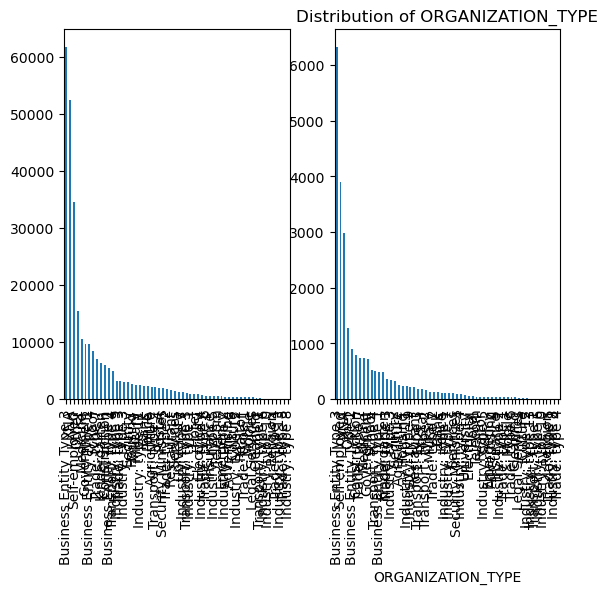

In [61]:
# univariate anaysis on Target 0 on category column
for i in application_data_categorical_col: 
    plt.subplot(1,2,1)
    dataset_target_0[i].value_counts(normalize=True).plot.bar()
    plt.subplot(1,2,2)
    dataset_target_1[i].value_counts(normalize=True).plot.bar()
    plt.xlabel(i)
    plt.title("Distribution of "+ i)
    plt.show()

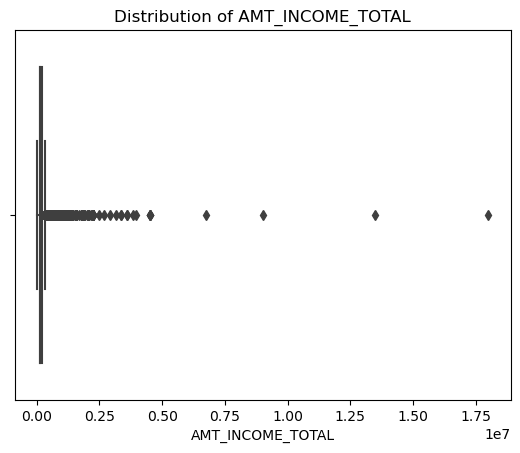

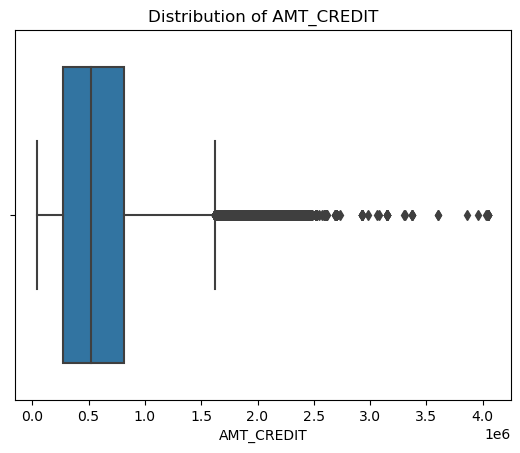

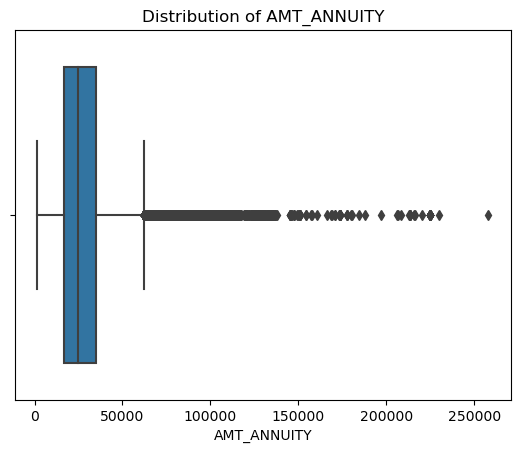

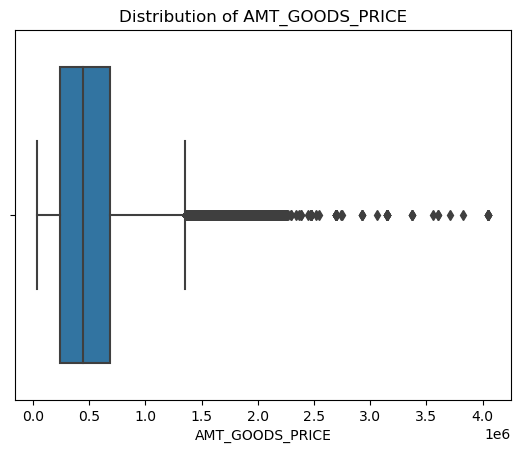

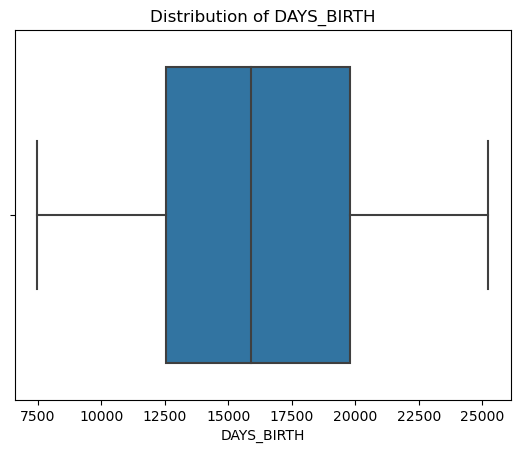

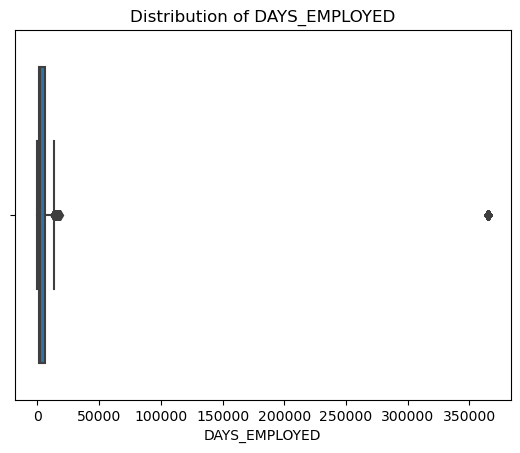

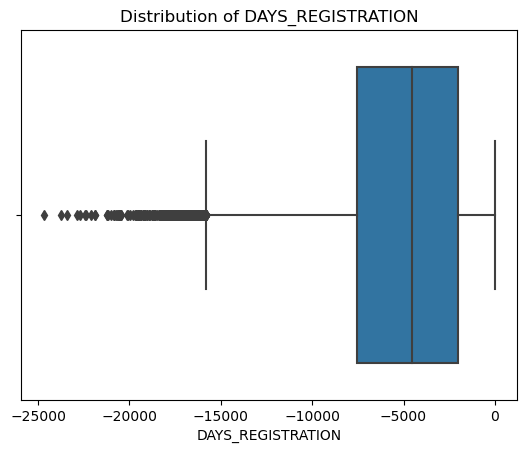

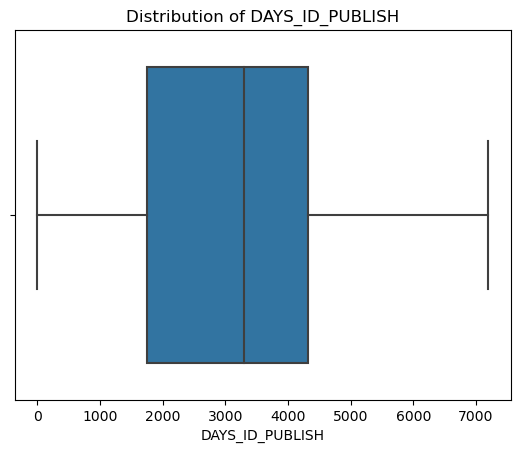

In [68]:
# univariate anaysis on Target 0

for i in application_data_continuos_col: 
    #plt.figure(Figsize=[10,6])
    #plt.subplot(1,2,1)
    sns.boxplot(dataset_target_0[i])
    #plt.subplot(1,2,2)
    #sns.boxplot(dataset_target_1[i])
    plt.xlabel(i)
    plt.title("Distribution of "+ i)
    plt.show()

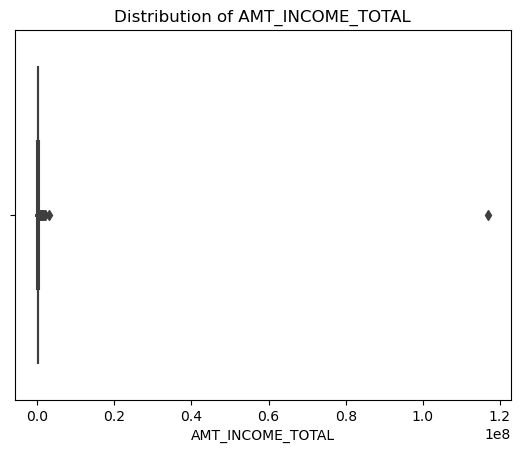

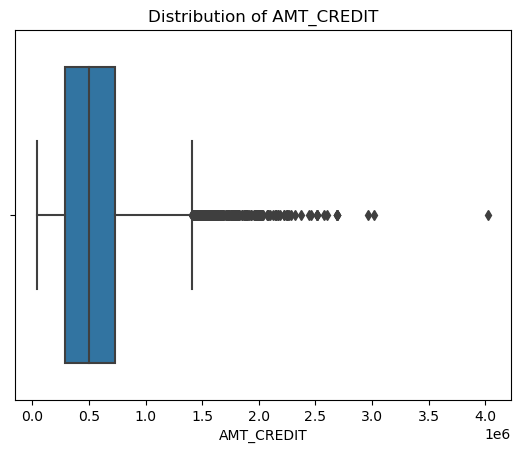

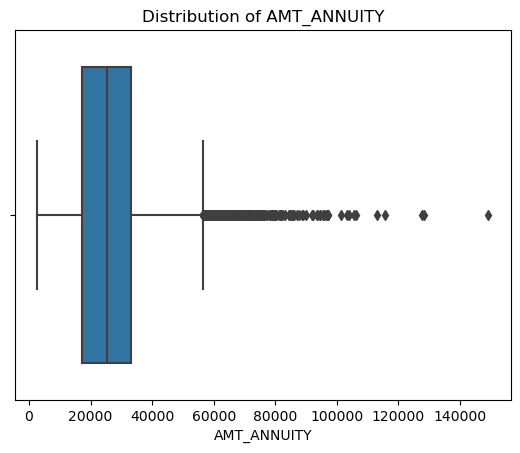

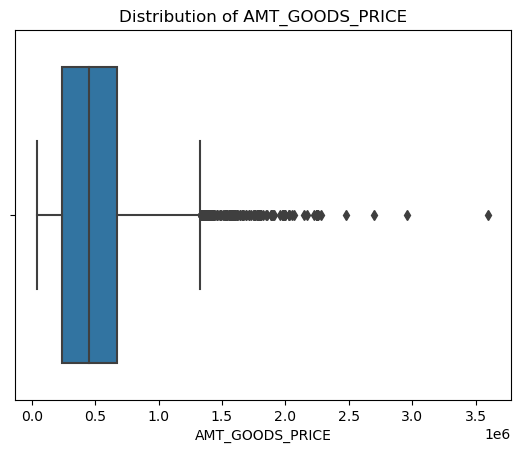

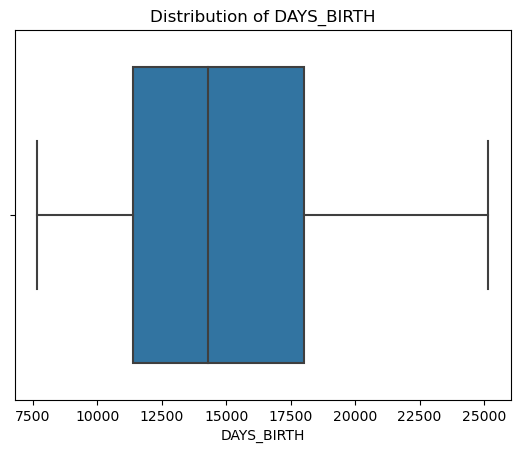

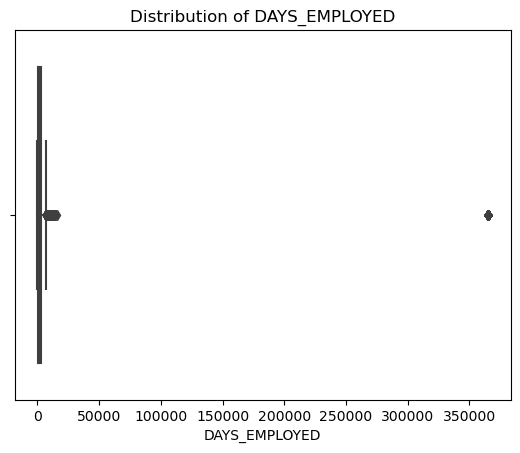

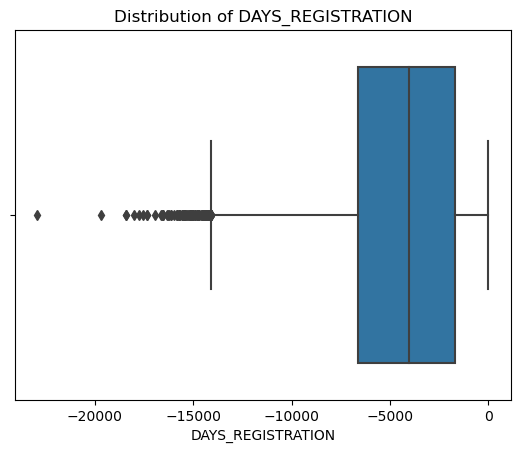

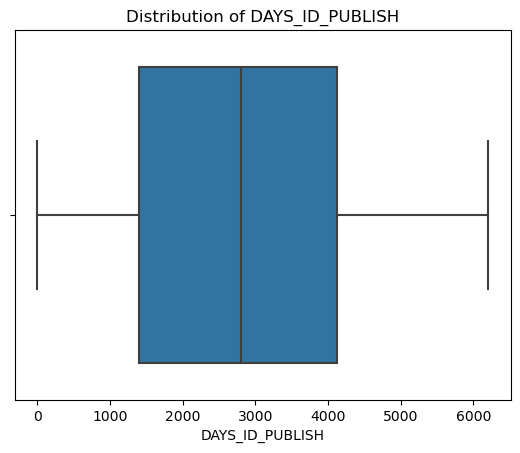

In [69]:
# univariate anaysis on Target 1

for i in application_data_continuos_col: 
    #plt.figure(Figsize=[10,6])
    #plt.subplot(1,2,1)
    sns.boxplot(dataset_target_1[i])
    #plt.subplot(1,2,2)
    #sns.boxplot(dataset_target_1[i])
    plt.xlabel(i)
    plt.title("Distribution of "+ i)
    plt.show()

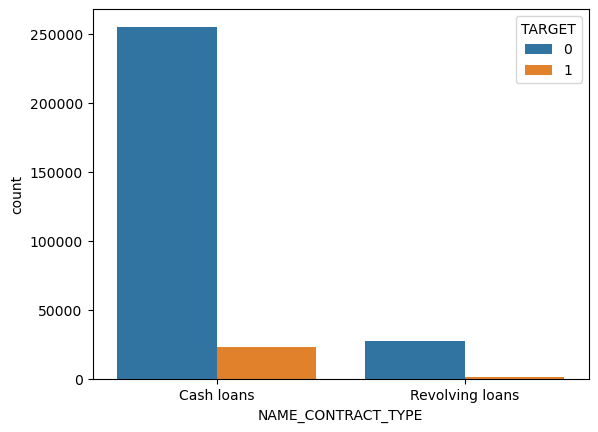

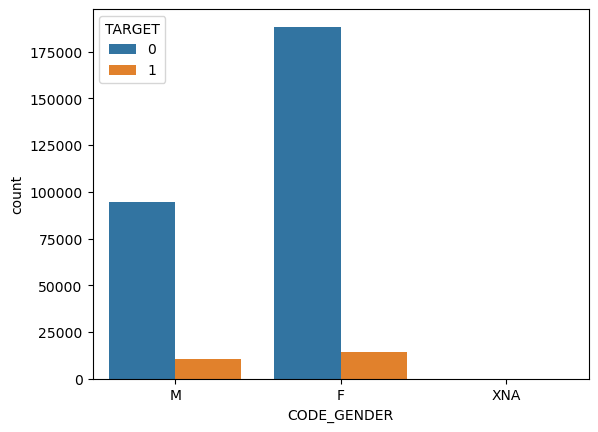

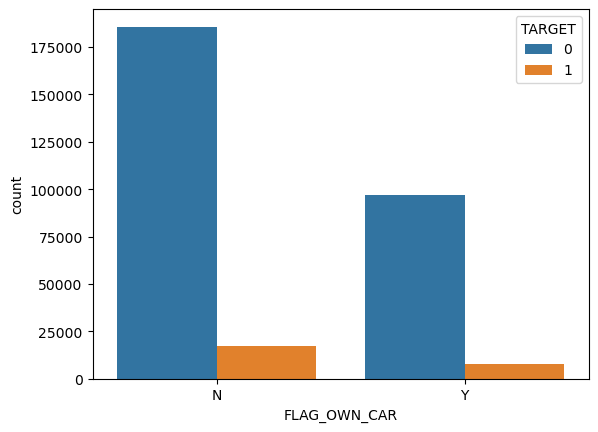

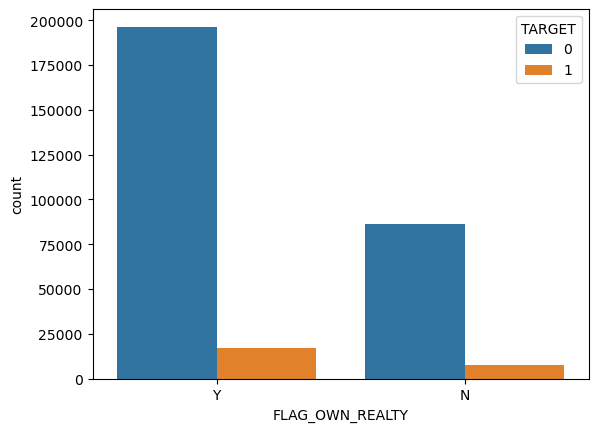

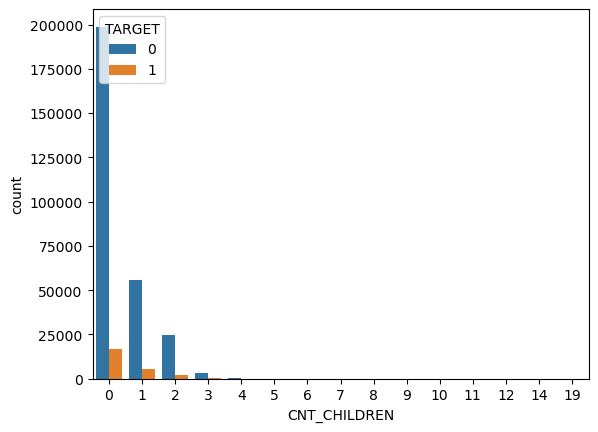

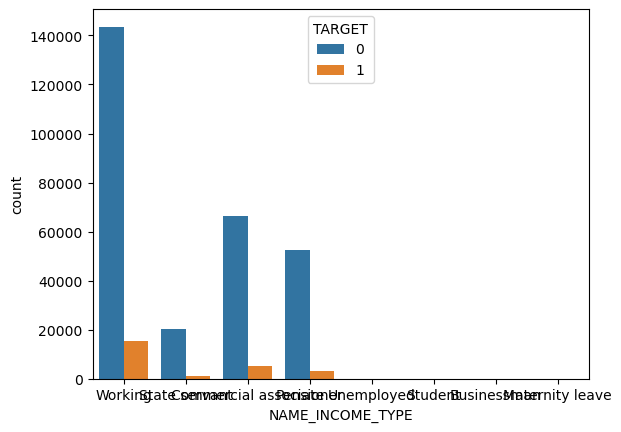

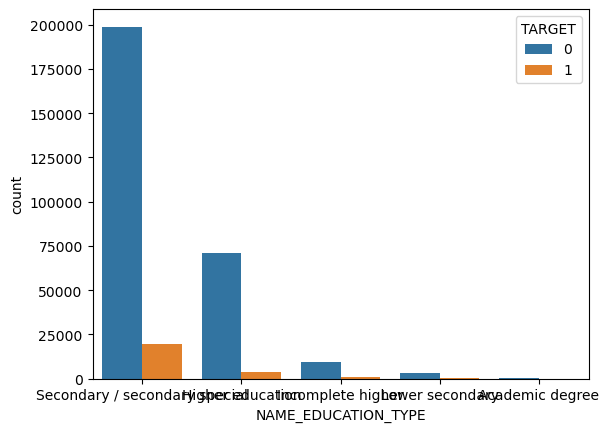

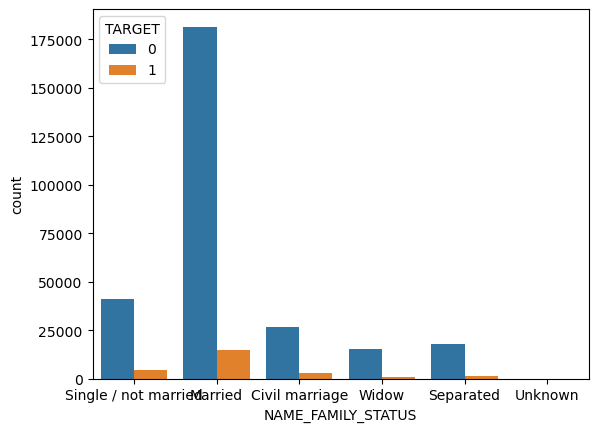

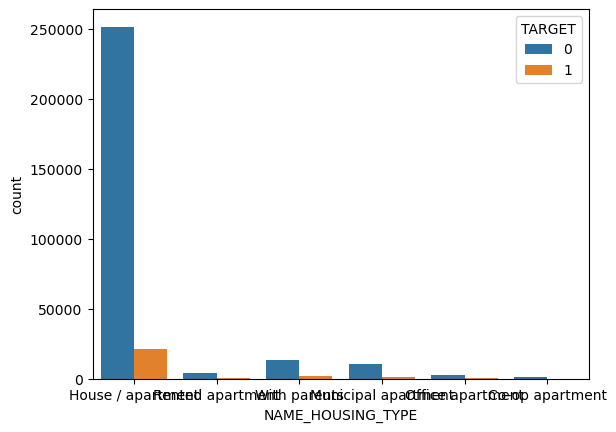

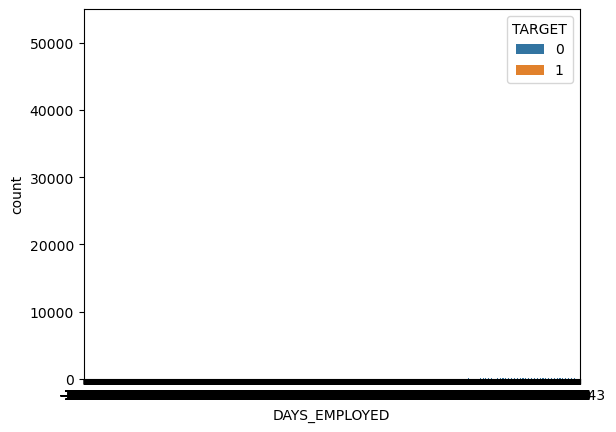

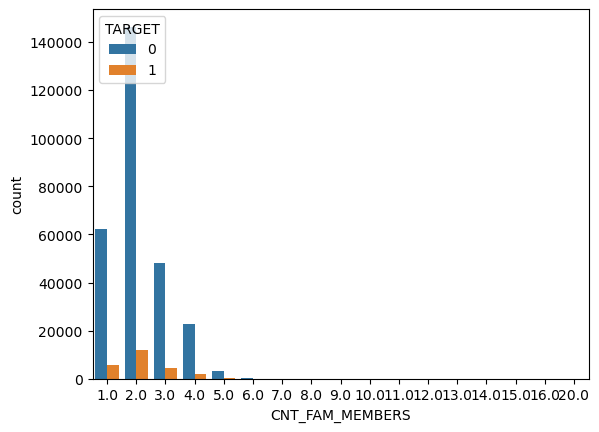

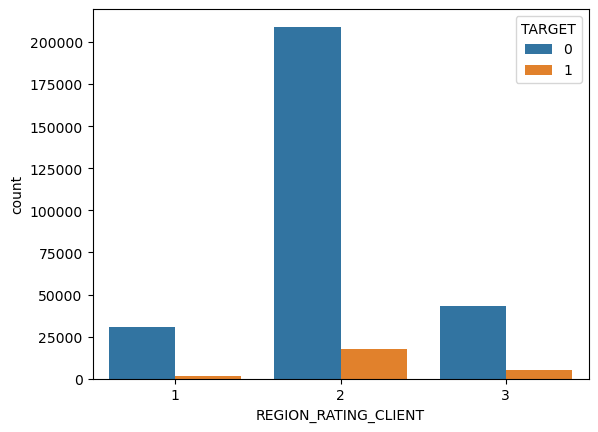

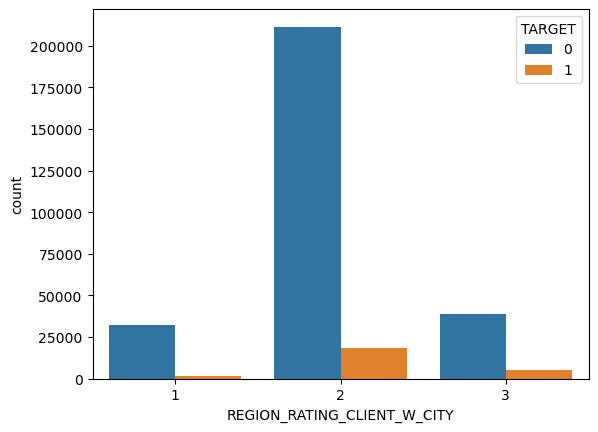

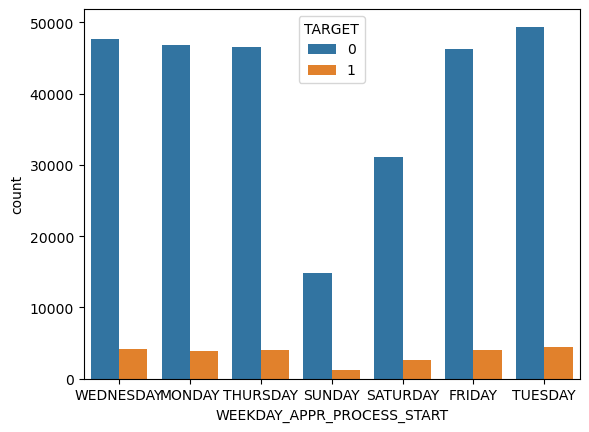

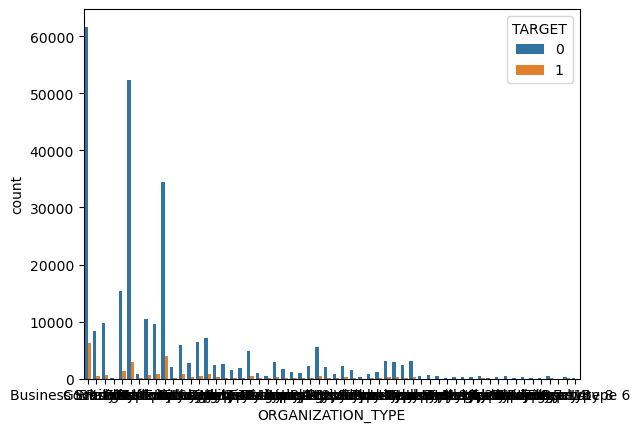

In [ ]:
# bi variate anaylisys
for i in  application_data_categorical_col:
    if i!="TARGET":
        #sns.boxplot(data= application_data, x=application_data["TARGET"], y=i)
        sns.countplot(x=i, hue='TARGET', data=application_data)
        plt.show()

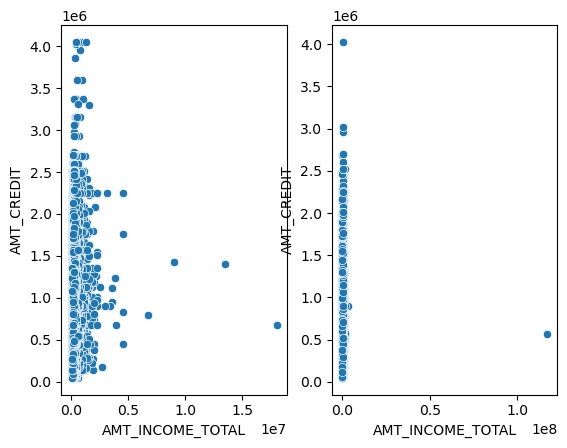

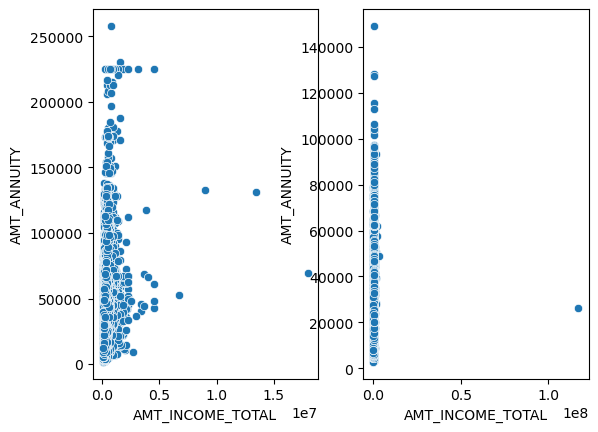

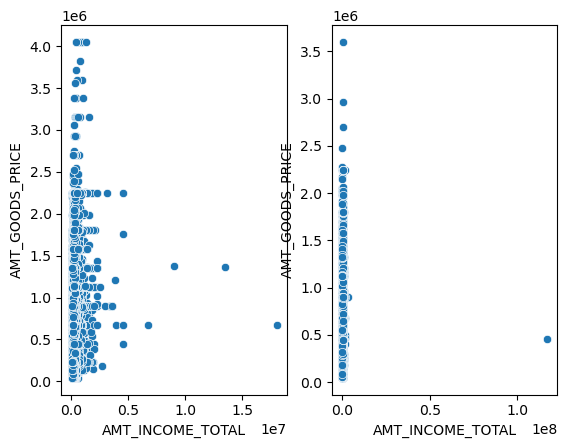

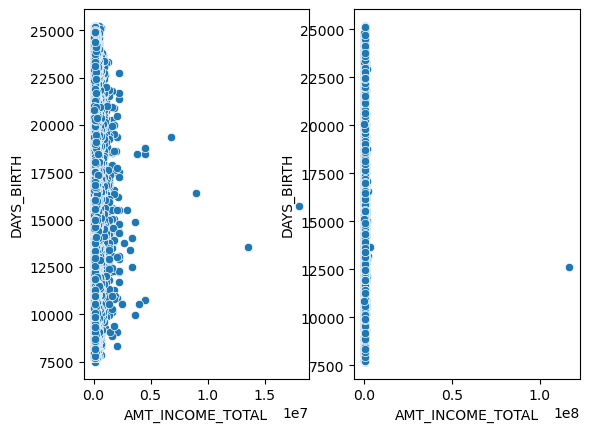

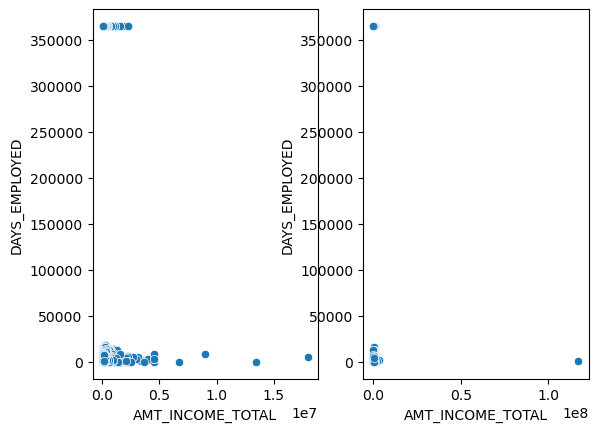

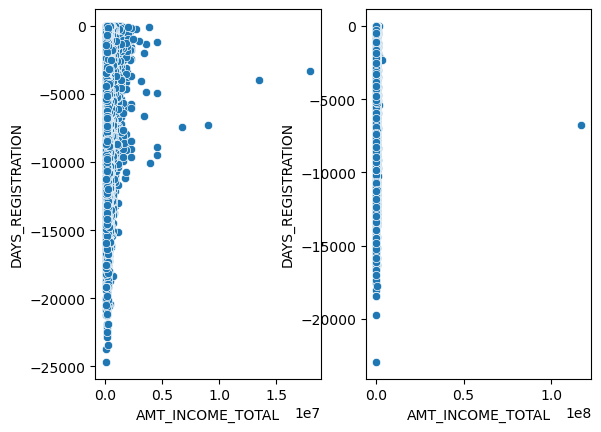

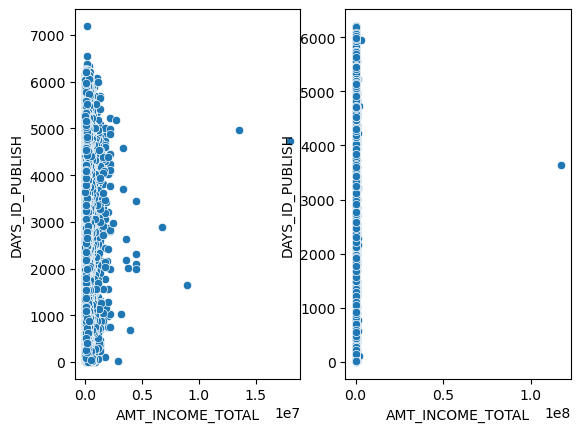

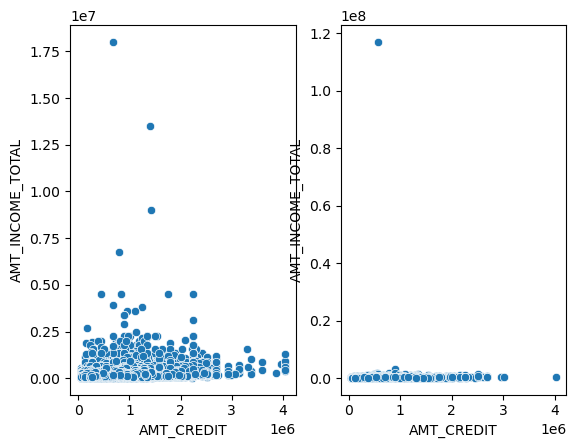

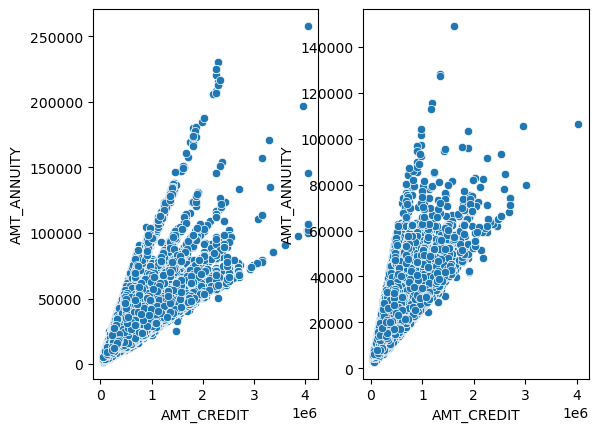

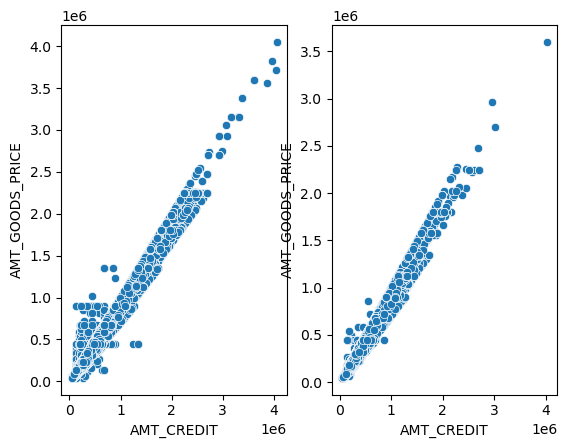

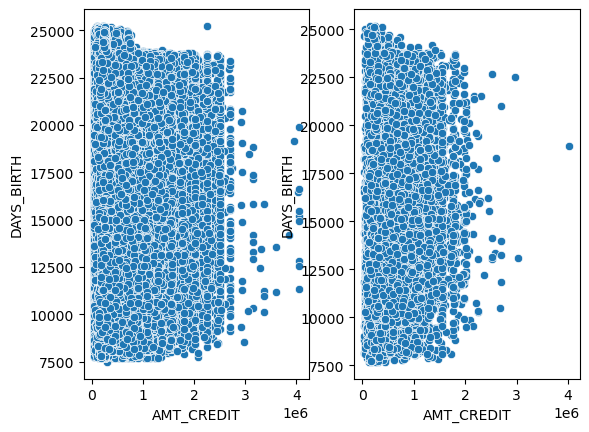

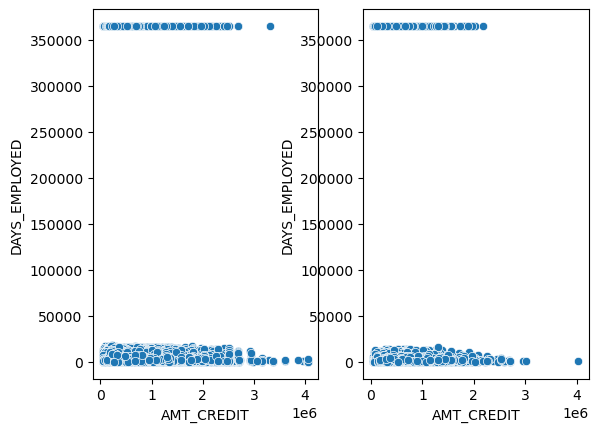

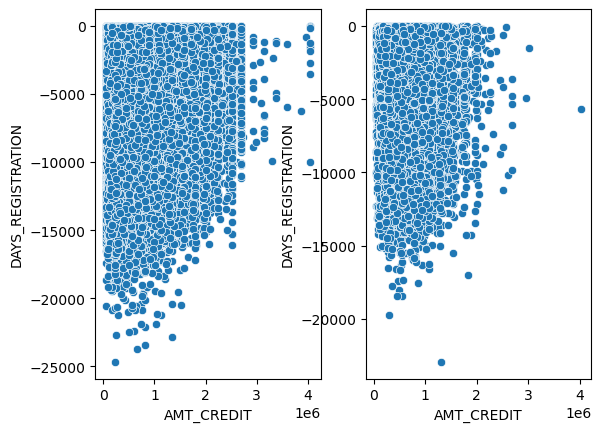

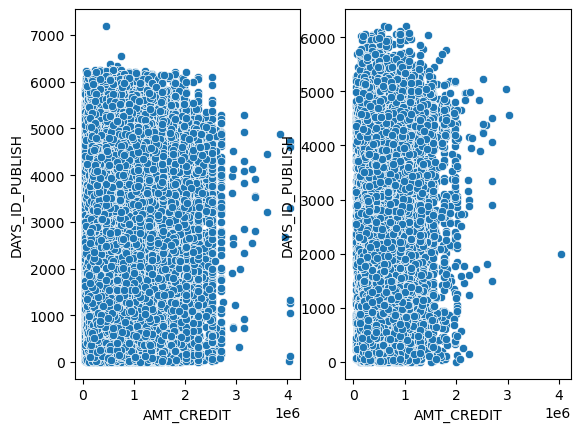

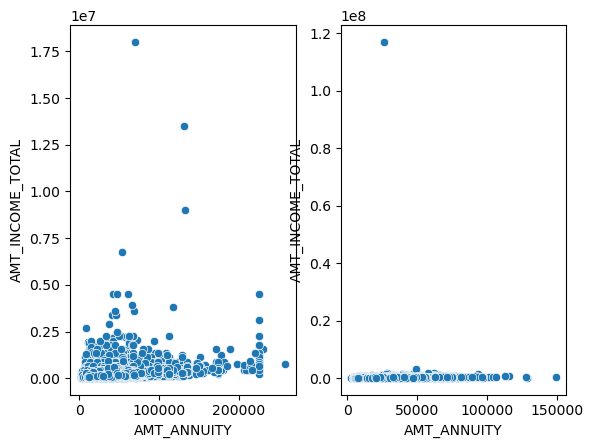

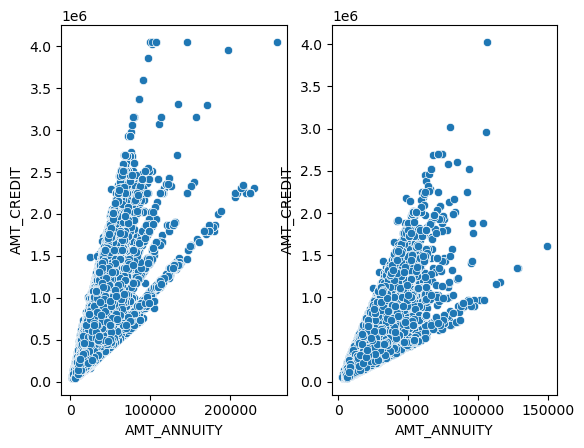

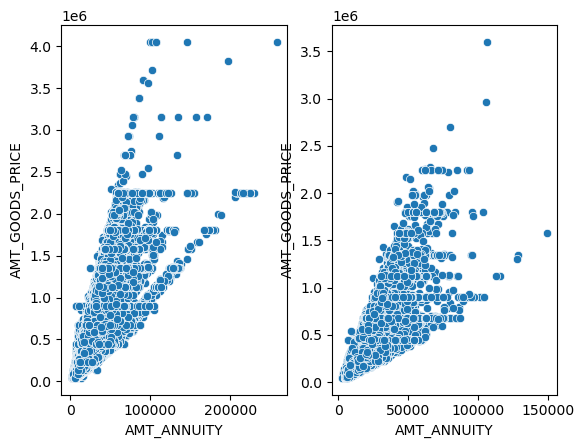

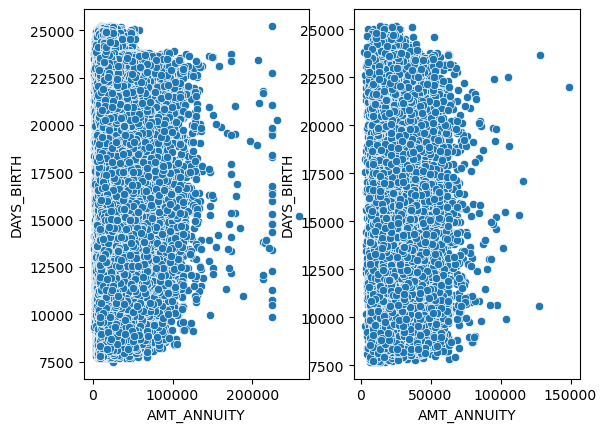

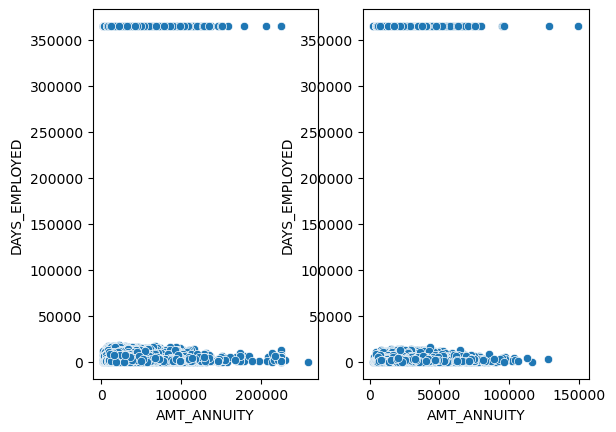

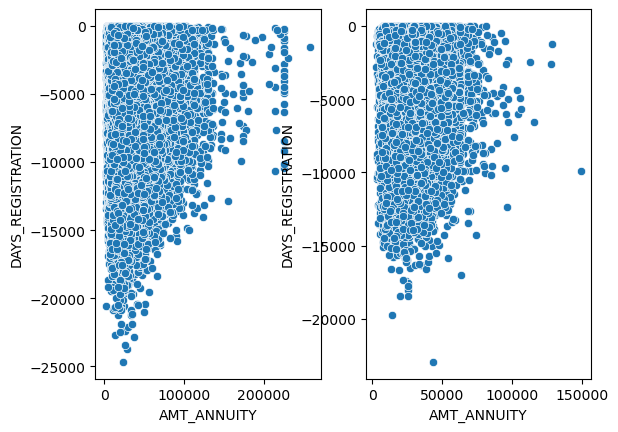

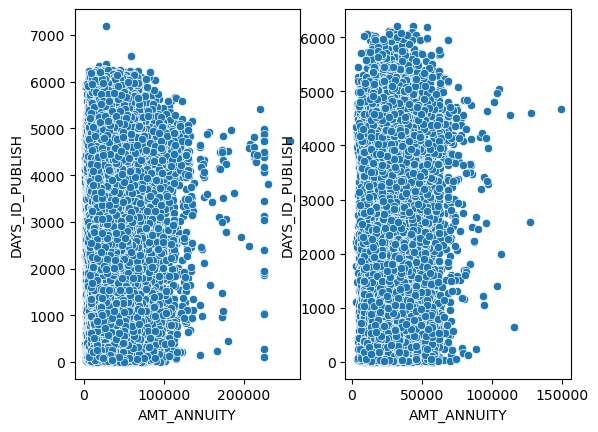

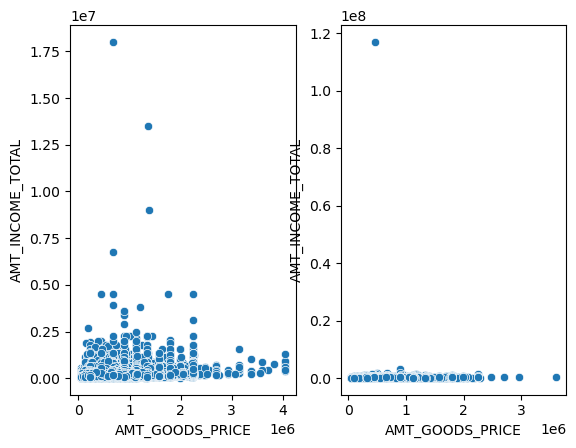

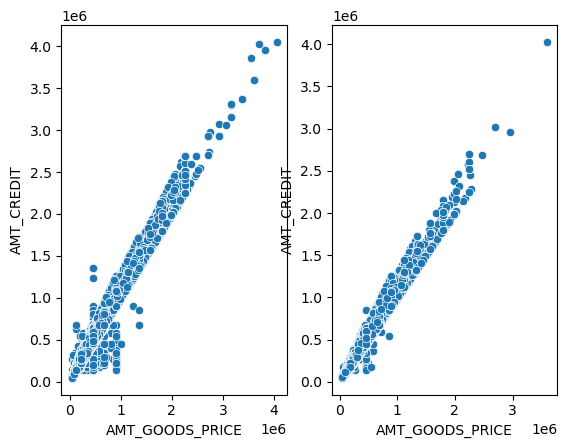

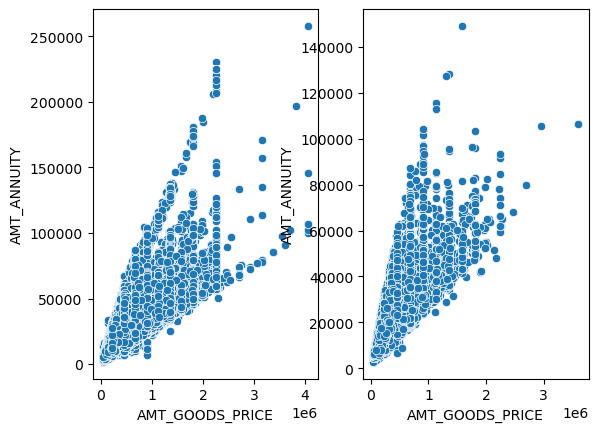

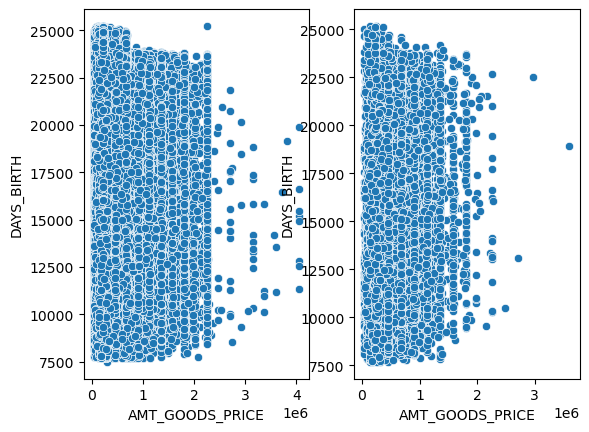

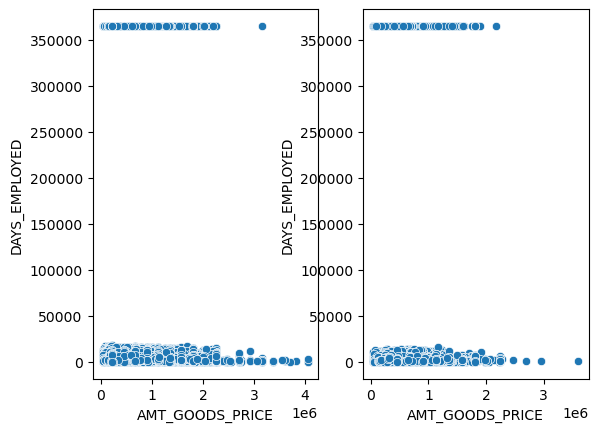

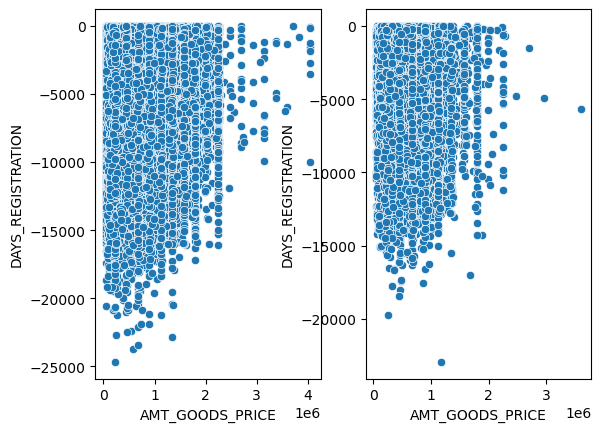

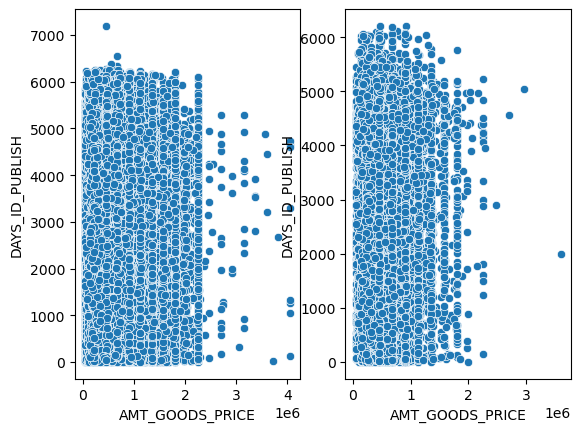

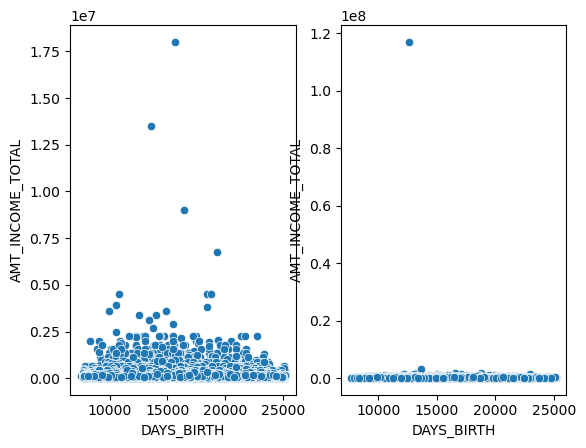

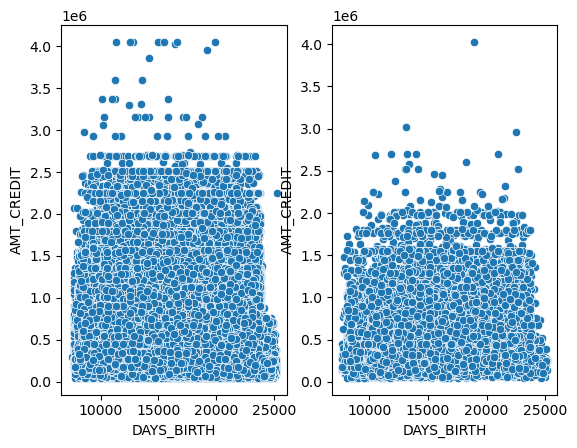

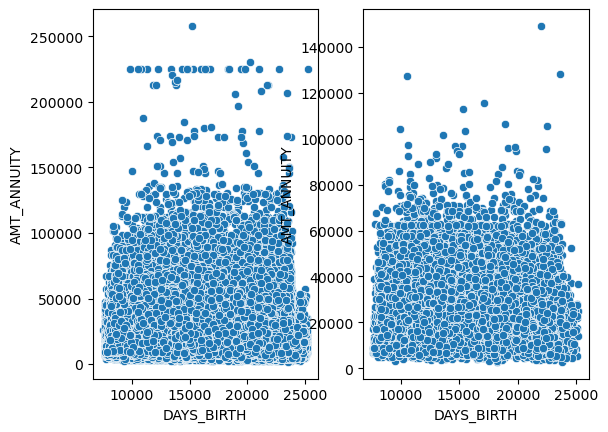

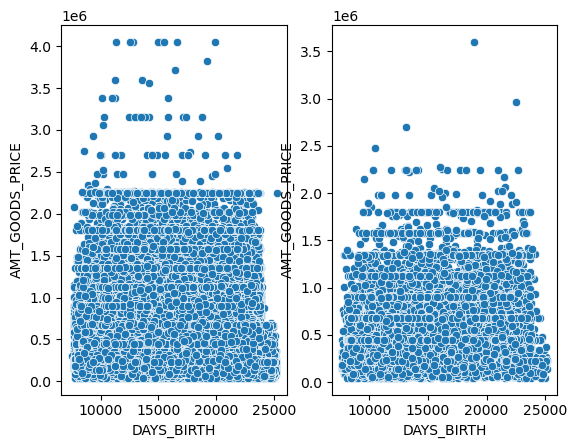

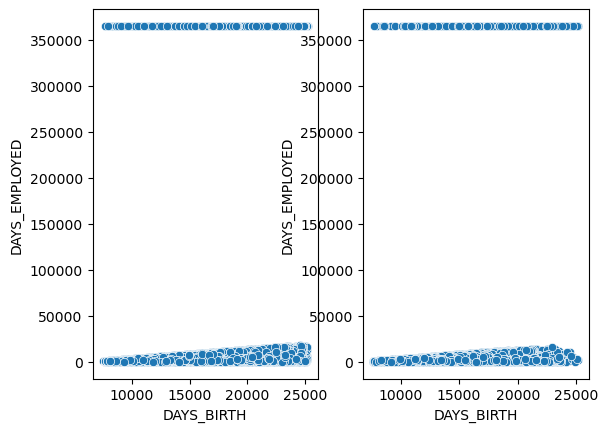

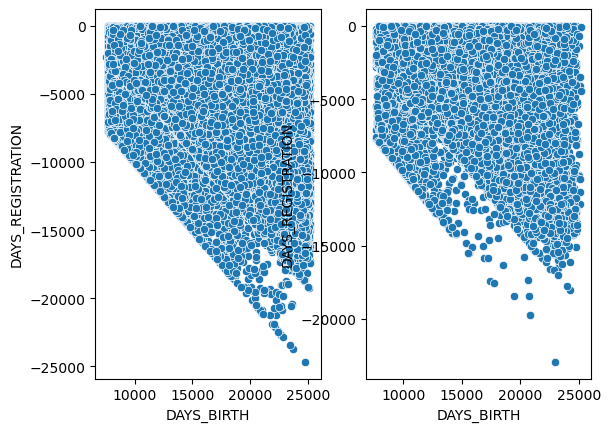

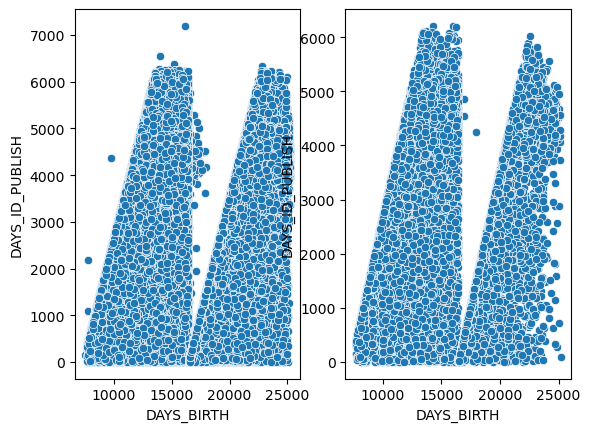

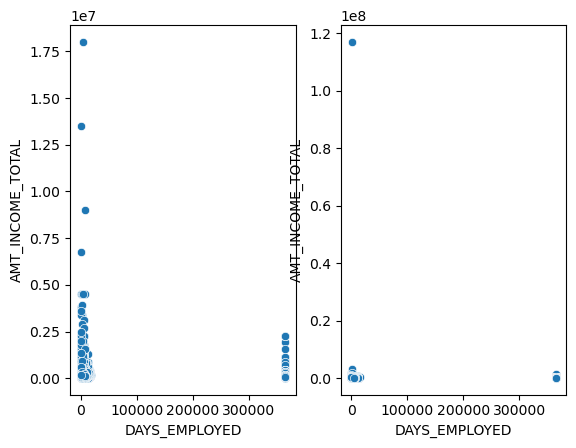

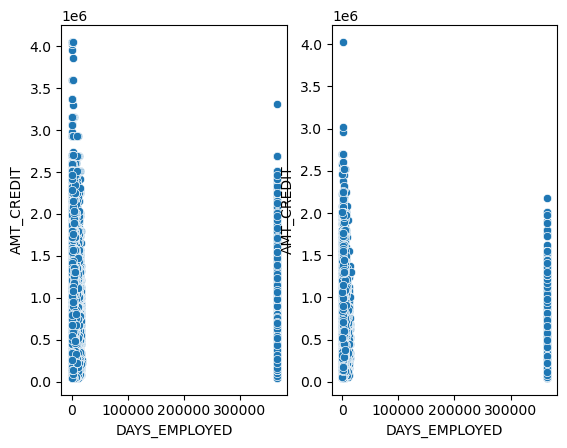

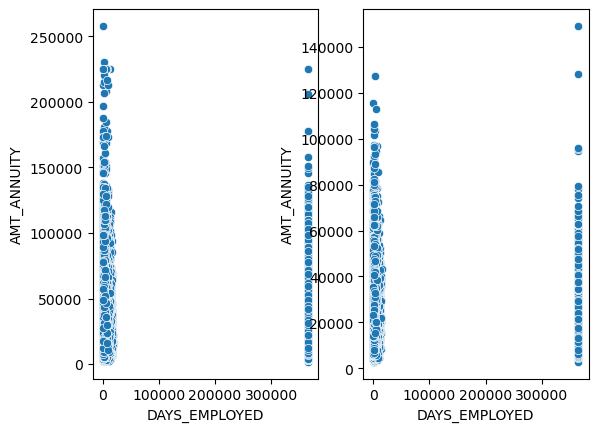

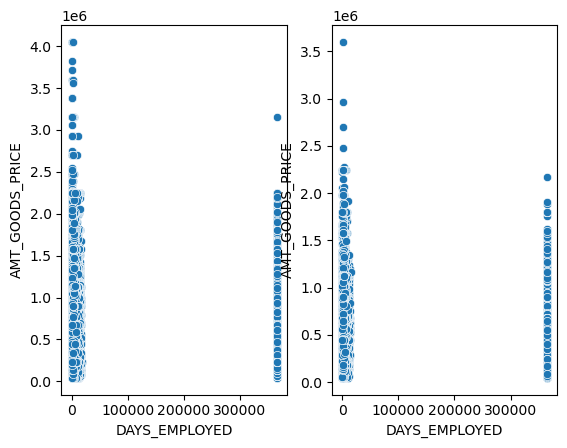

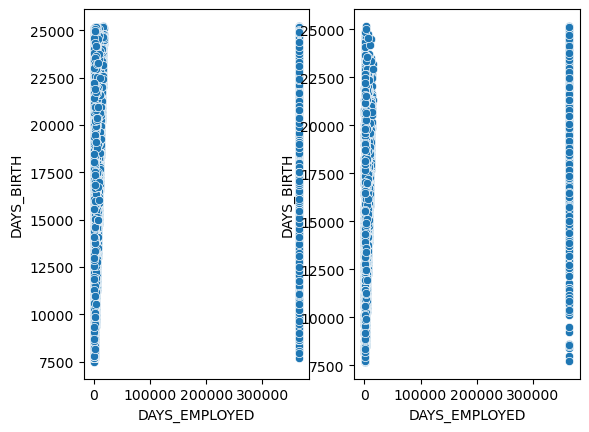

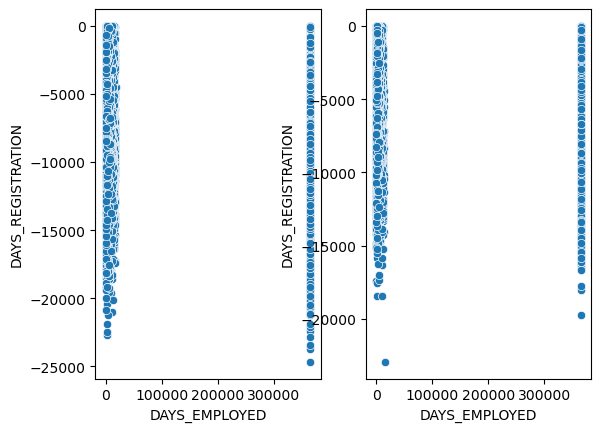

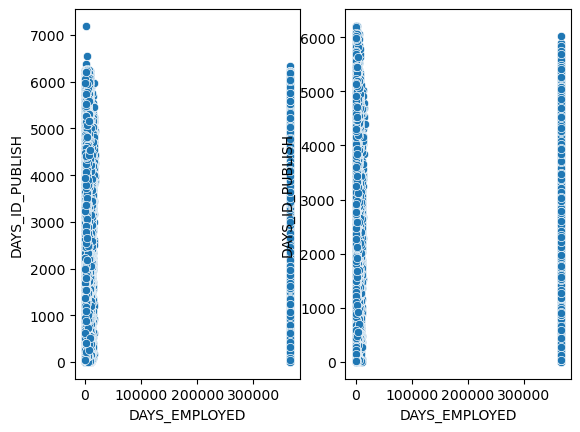

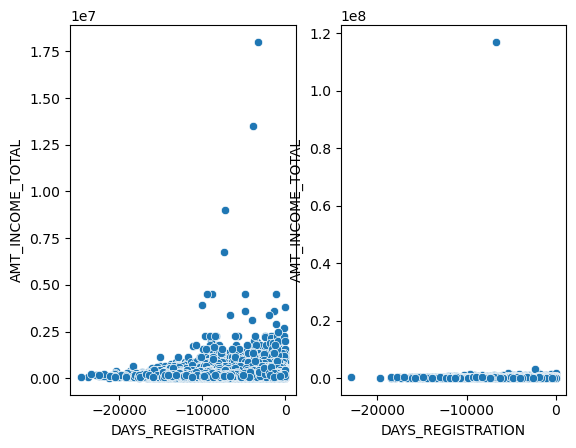

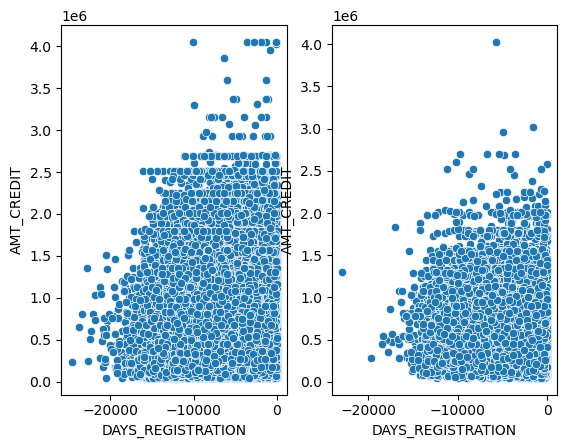

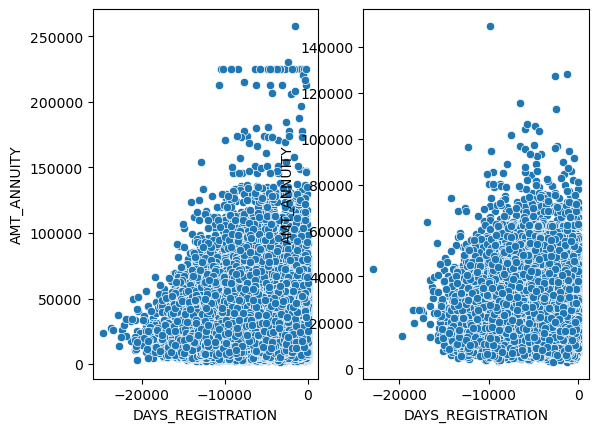

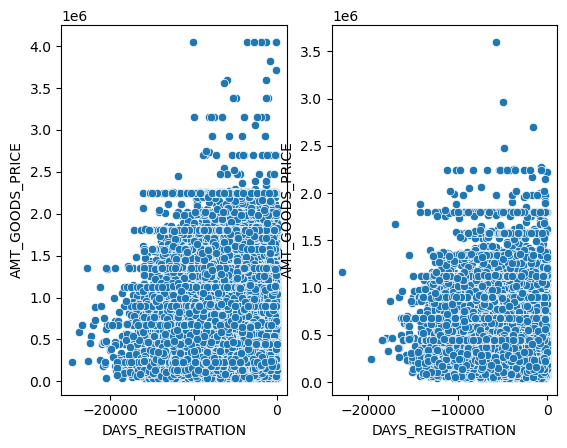

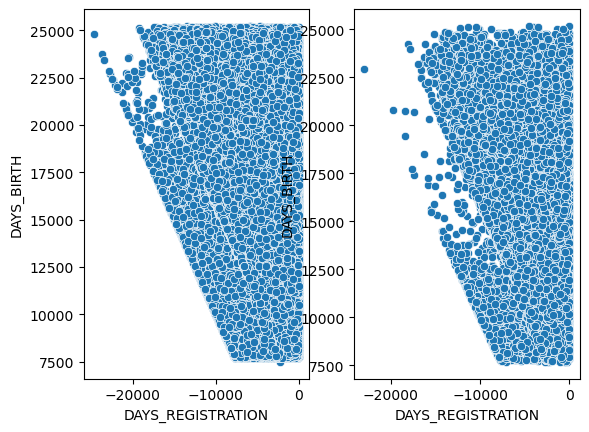

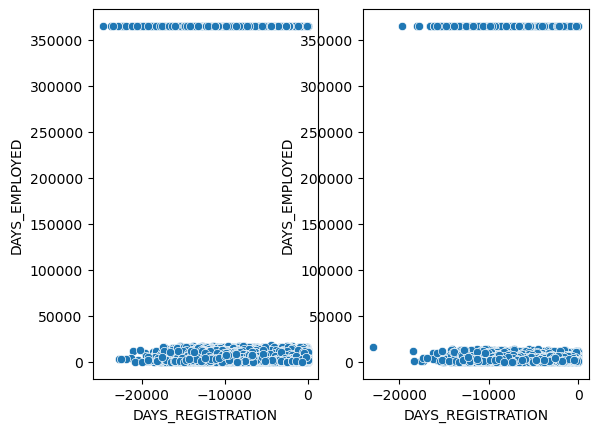

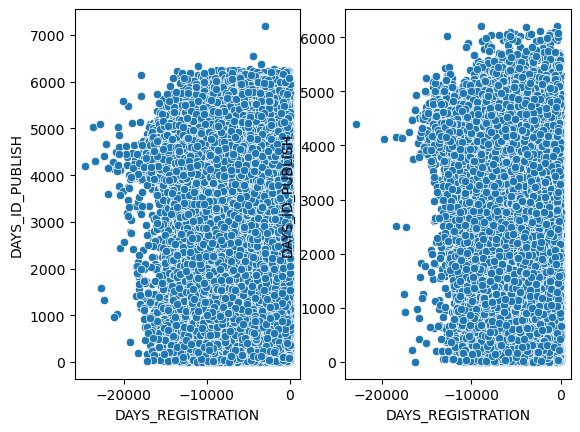

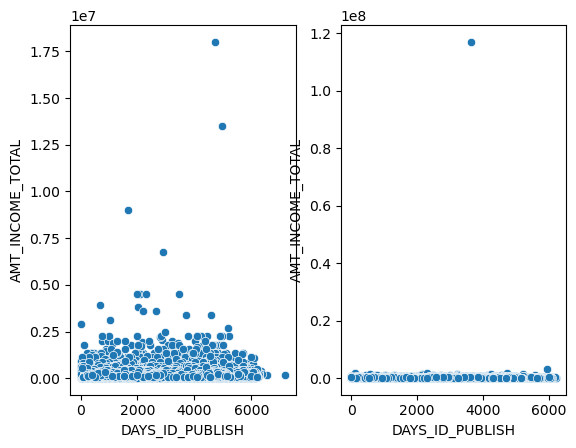

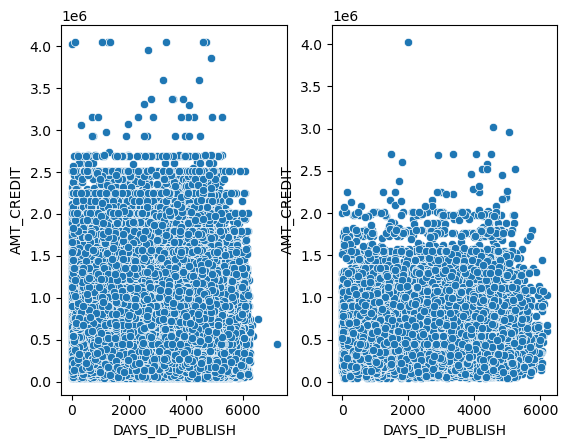

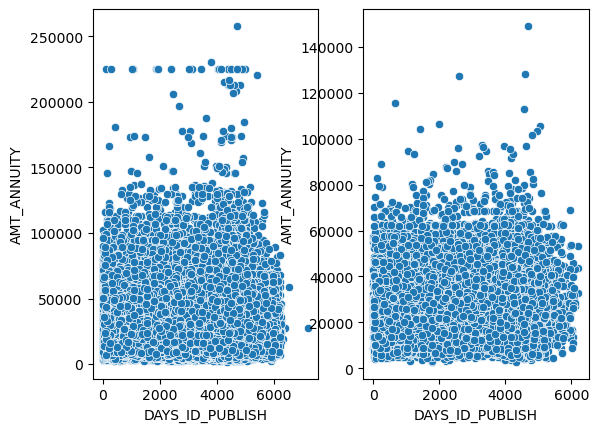

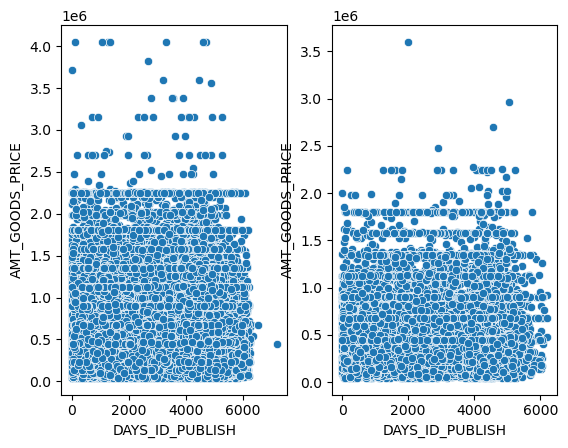

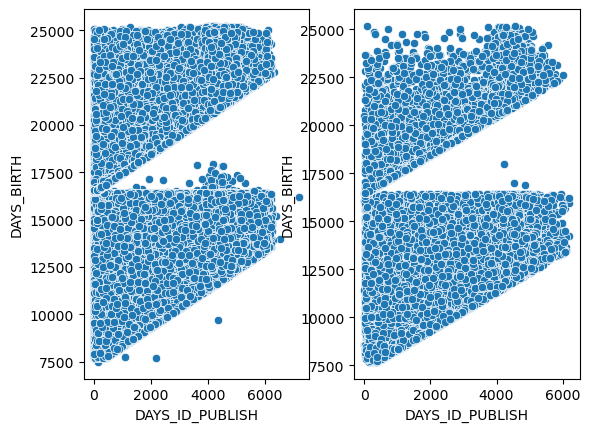

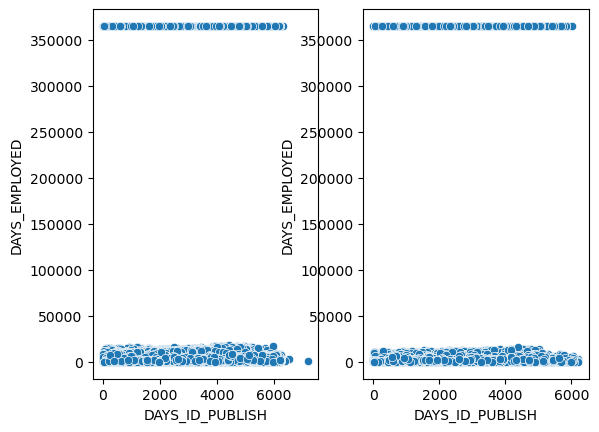

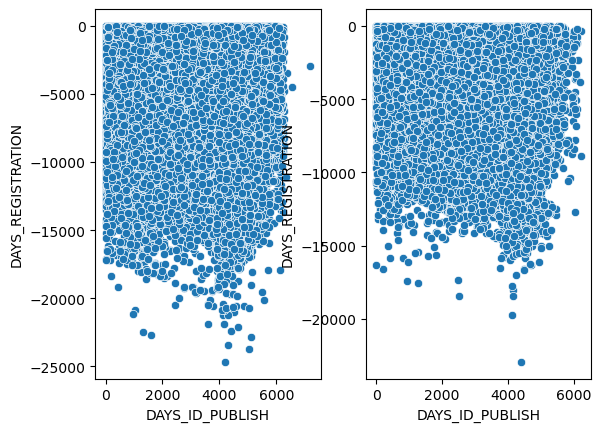

In [70]:
# bi variate anaylisys
for i in  application_data_continuos_col:
    for j in  application_data_continuos_col:
        if i!=j:
            plt.subplot(1,2,1)
            sns.scatterplot(i,j, data=dataset_target_0)
            plt.subplot(1,2,2)
            sns.scatterplot(i,j, data=dataset_target_1)
            plt.show()

<AxesSubplot:>

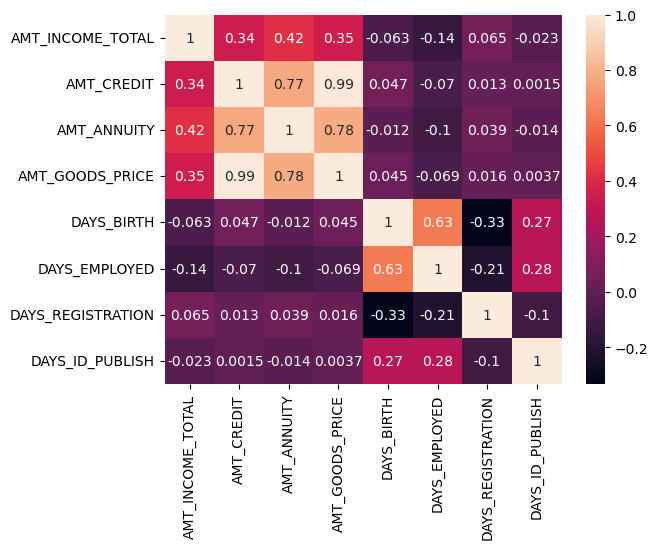

In [71]:
#correlation - target=0
corr= dataset_target_0[application_data_continuos_col].corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

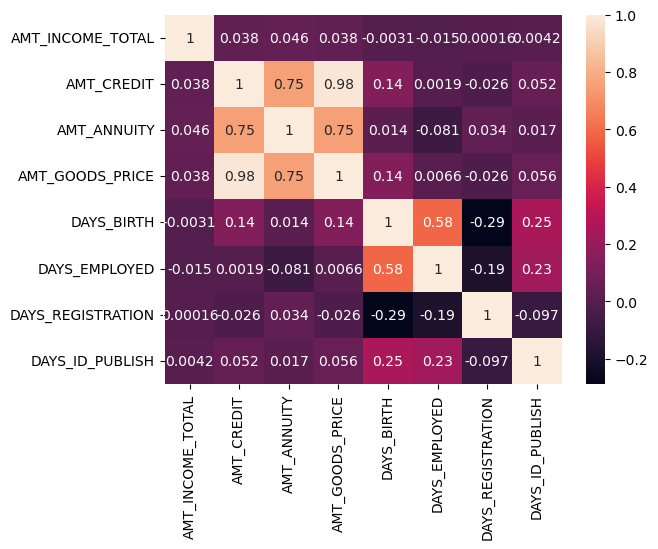

In [ ]:
corr= dataset_target_1[application_data_continuos_col].corr()
sns.heatmap(corr, annot=True)

In [97]:
#merge previous application dataset and application  data set
df = application_data.merge(previous_application[['SK_ID_CURR','NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS']],on='SK_ID_CURR', how='inner')

In [96]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100004       0      Revolving loans           M            Y   
4      100006       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               Y             0           67500.0      135000.0   
4               Y             0          135000.0      312682.5   

   AMT_ANNUITY_x  ...  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0        24700.5  ...                        0.0                        0.0   
1        35698.5  ...                        0.0                        0.0   
2        35698.5  ...                        0.0                        0.0   
3         6750.0  ...                        0.0                        0.0   
4        29686.5  ...                        NaN                        NaN   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       NaN                       NaN   

  AMT_REQ_CREDIT_BUREAU_YEAR                     bins  NAME_CONTRACT_TYPE_y  \
0                        1.0  (25649.999, 39017100.0]        Consumer loans   
1                        0.0  (25649.999, 39017100.0]            Cash loans   
2                        0.0  (25649.999, 39017100.0]        Consumer loans   
3                        0.0  (25649.999, 39017100.0]        Consumer loans   
4                        NaN  (25649.999, 39017100.0]            Cash loans   

   AMT_ANNUITY_y  AMT_CREDIT_y  NAME_CONTRACT_STATUS  
0       9251.775      179055.0              Approved  
1      98356.995     1035882.0              Approved  
2      64567.665      348637.5              Approved  
3       5357.250       20106.0              Approved  
4      24246.000      675000.0              Approved  

[5 rows x 76 columns]

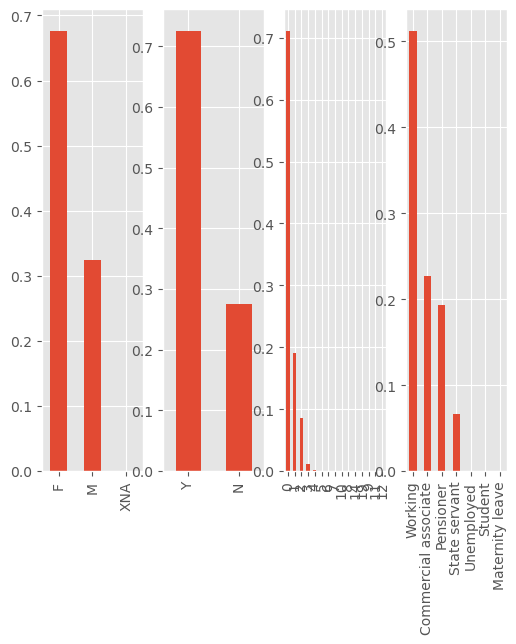

In [111]:
# univariate anaysis on Target 0
#check the outler in numerical column
application_data_categorical_col=['CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'
,'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'NAME_CONTRACT_STATUS']

application_data_continuos_col=['AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH','DAYS_EMPLOYED', 'AMT_ANNUITY_y',	'AMT_CREDIT_y']


# univariate anaysis on Target 0 on category column
plt.figure(figsize=[6,6])
plt.subplot(1,4,1)
df['CODE_GENDER'].value_counts(normalize=True).plot.bar() 
plt.subplot(1,4,2)
df['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.bar() 
plt.subplot(1,4,3)
df['CNT_CHILDREN'].value_counts(normalize=True).plot.bar() 
plt.subplot(1,4,4)
df['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar() 
plt.show()


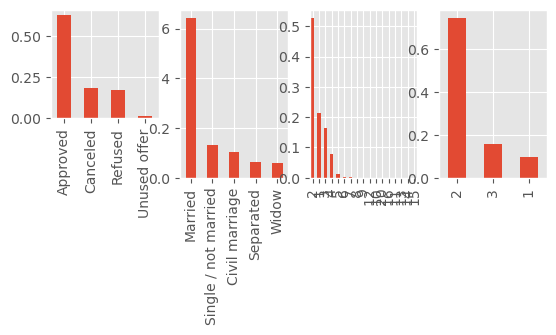

In [112]:

plt.subplot(2,4,1)
df['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar() 
plt.subplot(2,4,2)
df['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar() 
plt.subplot(2,4,3)
df['CNT_FAM_MEMBERS'].value_counts(normalize=True).plot.bar() 
plt.subplot(2,4,4)
df['REGION_RATING_CLIENT'].value_counts(normalize=True).plot.bar() 
plt.subplot(3,4,1)
df['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.bar() 
plt.show()

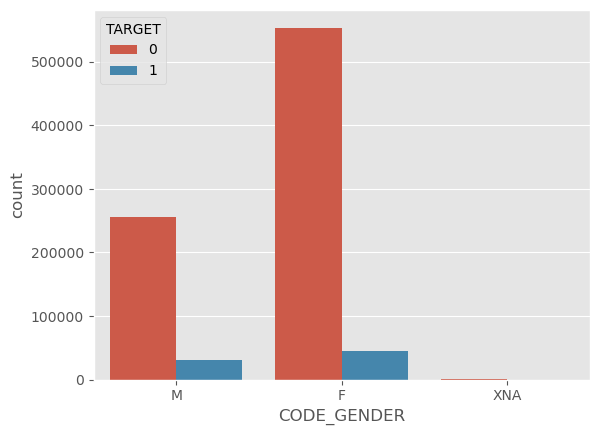

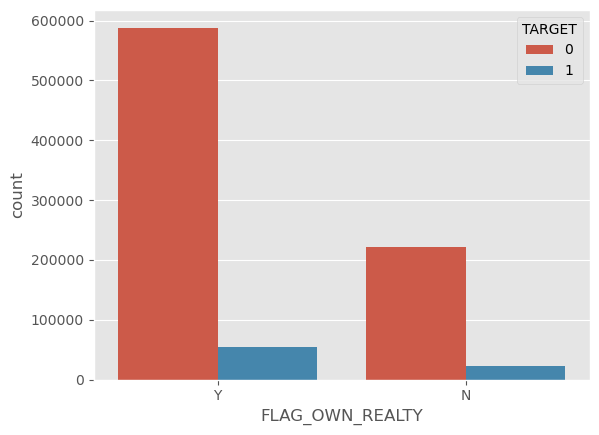

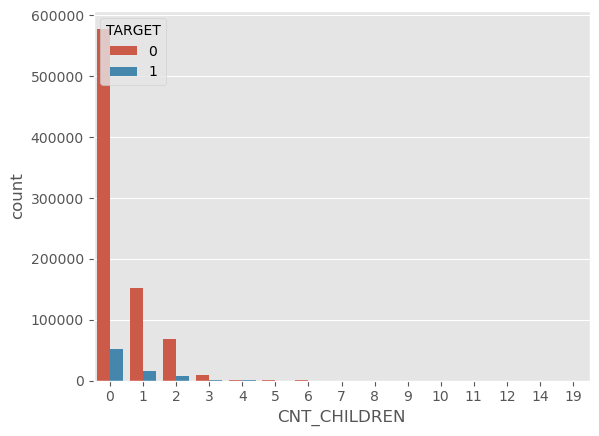

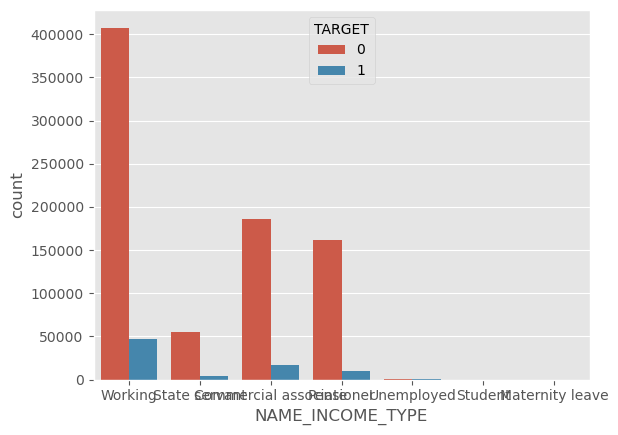

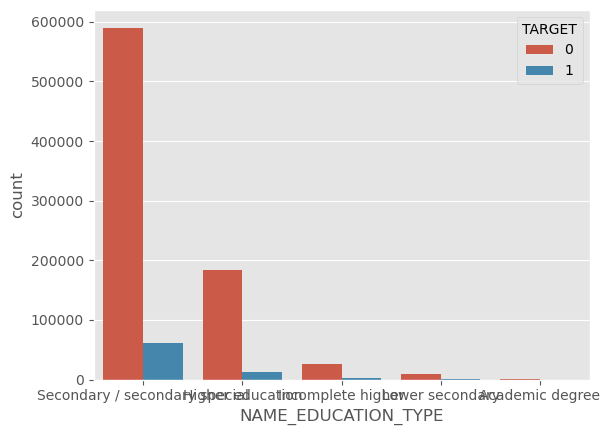

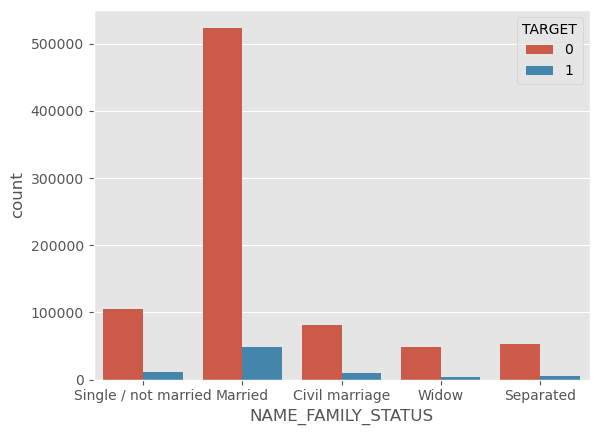

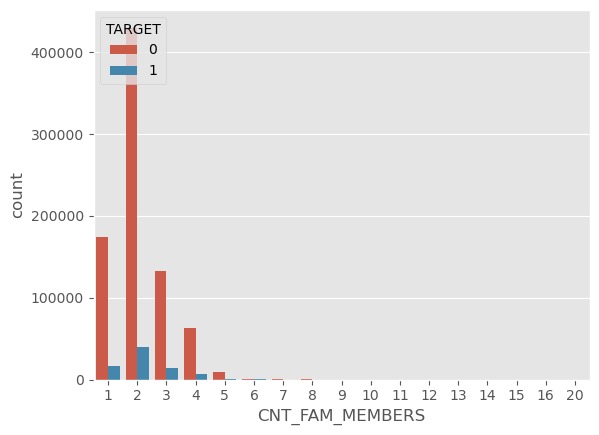

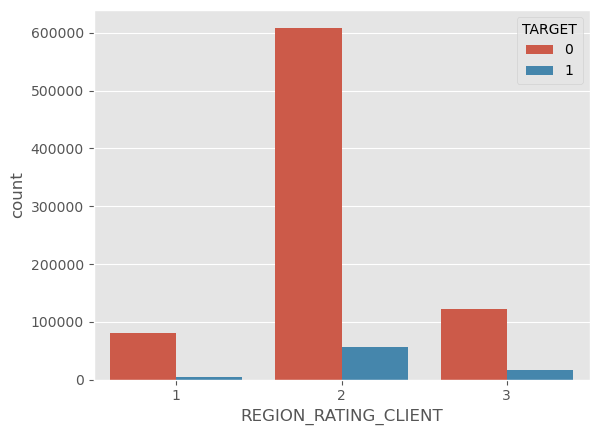

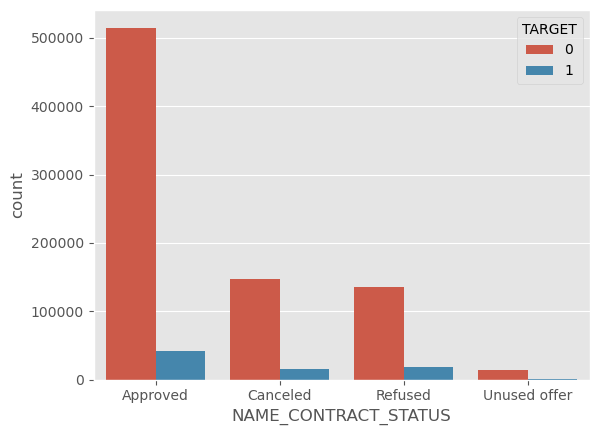

In [113]:
# bi variate anaylisys
for i in  application_data_categorical_col:
    if i!="TARGET":
        #sns.boxplot(data= application_data, x=application_data["TARGET"], y=i)
        sns.countplot(x=i, hue='TARGET', data=df)
        plt.show()